**Great Learning AIML CAPSTONE PROJECT**

*Computer Vision*

*Object Detection - Car*

**TEAM MEMBERS**

1.   Jalaj
2.   Karthik
3.   Kumar
4.   Himanshu
5.   Harshit
6.   Usha

**PROBLEM STATEMENT**

**•DOMAIN: Automotive Surveillance.**

**•CONTEXT:**

 Computer  vision  can  be  used  to  automate  supervision  and  generate  action  appropriate  action  trigger  if  the  event  is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.

 **•DATA DESCRIPTION:**

 - The Cars dataset contains 16,185 images of 196 classes of cars.
 - The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split.
 - Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

 **Data description:**
  
    ‣Train Images: Consists of real images of cars as per the make and year of the car.
  
    ‣Test Images: Consists of real images of cars as per the make and year of the car.
  
    ‣Train Annotation: Consists of bounding box region for training images.
  
    ‣Test Annotation: Consists of bounding box region for testing images.
  
  Dataset has been attached along with this project. Please use the same for this capstone project.
  
  Original  link  to  the  dataset  for  your  reference  only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder [ for your reference only ]
  
  **Reference:**  3D  Object  Representations  for  Fine-Grained  Categorisation,  Jonathan  Krause,  Michael  Stark,  Jia  Deng,  Li  Fei-Fei  4th  IEEE Workshop on 3D Representation and Recognition, at ICCV 2013(3dRR-13). Sydney, Australia. Dec. 8, 2013.
  
  **•PROJECT OBJECTIVE:**
  
  Design a DL based car identification model.
  
  **•PROJECT TASK: [ Score: 100 points]**

  **- 1.Milestone 1:[ Score: 40 points]**
    
    ‣Input: Context and Dataset
    
    ‣Process:
      
      ‣Step 1: Import the data. [ 3 points ]
      
      ‣Step 2: Map training and testing images to its classes. [ 6 points ]
      
      ‣Step 3: Map training and testing images to its annotations. [ 6 points ]
      
      ‣Step 4: Display images with bounding box. [ 5 points ]
      
      ‣Step 5: Design, train and test basic CNN models to classify the car. [ 10 points ]
      
      ‣Step 6: Interim report [ 10 points ]
    
    ‣Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1
    
    **- 2.Milestone 2: [ Score: 60 points]**
    
    ‣Input: Preprocessed output from Milestone-1
    
    ‣Process:
    
      ‣Step 1: Fine tune the trained basic CNN models to classify the car. [ 5 points ]
    
      ‣Step  2:  Design,  train  and  test  RCNN  &  its  hybrids  based  object  detection  models  to  impose  the  bounding  box  or mask over the area of interest. [ 10 points ]
      
      ‣Step 3: Pickle the model for future prediction [ 5 Points]
      
      ‣Step 4: Final Report [40 Points]
    
    ‣Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2
    
    **- 3.Milestone 3: [ Optional ]**
    
    ‣Process:
    
      ‣Step 1: Design a clickable UI based interface which can allow the user to browse & input the image, output the class and the bounding box or mask [ highlight area of interest ] of the input image
    
    ‣Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface
    
    ‣References and hints:
    
      ‣Please refer to the blog to understand the basics of object detection: https://www.mygreatlearning.com/blog/object-detection-using-tensorflow/
      
      ‣YOLO object detection using OpenCV: https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/?highlight=detection
      
      ‣Face detection: https://www.mygreatlearning.com/blog/face-recognition/?highlight=detection
      
      ‣To make GUI as a desk app you can use TKINTER library. You are free to use any other library.
      
      ‣To make web service GUI you can use FLASK or DJANGO library.



In [ ]:
#‣Step 1: Import the data. [ 3 points ]
#‣Step 2: Map training and testing images to its classes. [ 6 points ]
#‣Step 3: Map training and testing images to its annotations. [ 6 points ]
#‣Step 4: Display images with bounding box. [ 5 points ]
#‣Step 5: Design, train and test basic CNN models to classify the car. [ 10 points ]
#‣Step 6: Interim report [ 10 points ]
import time
start_time = time.time()
print("Start Time:",start_time)

Start Time: 1709466648.8931475


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as image
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
import zipfile
from zipfile import ZipFile

from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from keras.applications import ResNet50
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_width = 224
img_height = 224
maxnbr_classes = 16
maxdataset_classes = 196
img_channels=3
number_of_epochs = 20
batch_size = 16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#‣Step 1: Import the data. [ 3 points ]

In [ ]:
project_path = '/content/drive/MyDrive/CAPSTONE/'
car_image_zipfile = project_path + "Car+Images.zip"
annotations_zipfile = project_path + "Annotations.zip"
annotations_path = project_path+"Annotations/"
car_images_path = project_path+"Car Images/"

carnamesmakeclassfile = project_path + "Car+names+and+make.csv"
test_annotation_csvfile = annotations_path+"Test Annotation.csv"
train_annotation_csvfile = annotations_path+"Train Annotations.csv"

test_images_folder = car_images_path + "Test Images/"
train_images_folder = car_images_path + "Train Images/"

In [ ]:
#unzip(car_image_zipfile,car_images_path)
#with ZipFile(car_image_zipfile, 'r') as zipObject:
#	zipObject.extractall(path=project_path)

In [ ]:
#Unzip Annotations
#with ZipFile(annotations_zipfile, 'r') as zipObject:
  #zipObject.extractall(path=project_path)

In [ ]:
#Read csv files into dataframes
columns = ['carname_make']
carnamesmakeclass_df = pd.read_csv(carnamesmakeclassfile,header=None, names=columns)
carnamesmakeclass_df.index += 1

In [ ]:
columns = ['img_filename','x1','y1','x2','y2','img_class']
test_annotation_df = pd.read_csv(test_annotation_csvfile,names=columns)
test_annotation_df = test_annotation_df.drop([test_annotation_df.index[0]],axis=0)
test_annotation_df.reset_index(inplace = True)
test_annotation_df = test_annotation_df.drop(['index'],axis=1)

In [ ]:
columns = ['img_filename','x1','y1','x2','y2','img_class']
train_annotation_df = pd.read_csv(train_annotation_csvfile,names=columns)
train_annotation_df = train_annotation_df.drop([train_annotation_df.index[0]],axis=0)
train_annotation_df.reset_index(inplace = True)
train_annotation_df = train_annotation_df.drop(['index'],axis=1)

In [ ]:
print("carnamesmakeclass dataframe shape:",carnamesmakeclass_df.shape)
print("test_annotation dataframe shape:",test_annotation_df.shape)
print("train_annotation dataframe shape:",train_annotation_df.shape)

carnamesmakeclass dataframe shape: (196, 1)
test_annotation dataframe shape: (8041, 6)
train_annotation dataframe shape: (8144, 6)


In [ ]:
carnamesmakeclass_df.head()

carname_make
1  AM General Hummer SUV 2000
2         Acura RL Sedan 2012
3         Acura TL Sedan 2012
4        Acura TL Type-S 2008
5        Acura TSX Sedan 2012

In [ ]:
test_annotation_df.head()

img_filename   x1     y1     x2     y2 img_class
0    00001.jpg   30   52.0  246.0  147.0       181
1    00002.jpg  100   19.0  576.0  203.0       103
2    00003.jpg   51  105.0  968.0  659.0       145
3    00004.jpg   67   84.0  581.0  407.0       187
4    00005.jpg  140  151.0  593.0  339.0       185

In [ ]:
test_annotation_df['img_class'].nunique()

196

In [ ]:
train_annotation_df.head()

img_filename   x1     y1      x2      y2 img_class
0    00001.jpg   39  116.0   569.0   375.0        14
1    00002.jpg   36  116.0   868.0   587.0         3
2    00003.jpg   85  109.0   601.0   381.0        91
3    00004.jpg  621  393.0  1484.0  1096.0       134
4    00005.jpg   14   36.0   133.0    99.0       106

In [ ]:
test_annotation_df['img_class'].nunique()

196

In [ ]:
train_annotation_df['img_filename'] = train_annotation_df['img_filename'].astype('str')
train_annotation_df['img_class'] = train_annotation_df['img_class'].astype('int')
train_annotation_df['x1'] = train_annotation_df['x1'].astype('int')
train_annotation_df['y1'] = train_annotation_df['y1'].astype('int')
train_annotation_df['x2'] = train_annotation_df['x2'].astype('int')
train_annotation_df['y2'] = train_annotation_df['y2'].astype('int')

test_annotation_df['img_filename'] = test_annotation_df['img_filename'].astype('str')
test_annotation_df['img_class'] = test_annotation_df['img_class'].astype('int')
test_annotation_df['x1'] = test_annotation_df['x1'].astype('int')
test_annotation_df['y1'] = test_annotation_df['y1'].astype('int')
test_annotation_df['x2'] = test_annotation_df['x2'].astype('int')
test_annotation_df['y2'] = test_annotation_df['y2'].astype('int')

In [ ]:
test_annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img_filename  8041 non-null   object
 1   x1            8041 non-null   int64 
 2   y1            8041 non-null   int64 
 3   x2            8041 non-null   int64 
 4   y2            8041 non-null   int64 
 5   img_class     8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


In [ ]:
train_annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img_filename  8144 non-null   object
 1   x1            8144 non-null   int64 
 2   y1            8144 non-null   int64 
 3   x2            8144 non-null   int64 
 4   y2            8144 non-null   int64 
 5   img_class     8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


<Axes: >

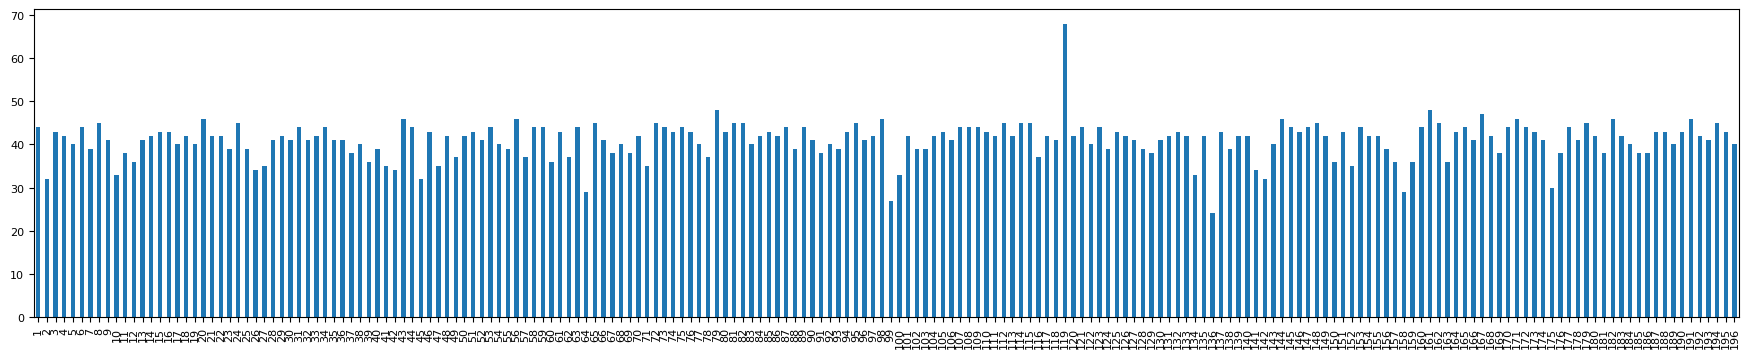

In [ ]:
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
test_annotation_df.img_class.value_counts().sort_index().plot(kind='bar')

In [ ]:
test_annotation_value_counts_df = test_annotation_df.img_class.value_counts().sort_index()
maxidx = test_annotation_value_counts_df.idxmax()
print("Max images of class in test_annotations:",carnamesmakeclass_df.loc[maxidx]['carname_make'],"with ",test_annotation_value_counts_df.loc[maxidx],"images count, img_class=",maxidx)

Max images of class in test_annotations: GMC Savana Van 2012 with  68 images count, img_class= 119


In [ ]:
test_annotation_value_counts_df = test_annotation_df.img_class.value_counts().sort_index()
minidx = test_annotation_value_counts_df.idxmin()
print("Minimum images of class in test_annotations:",carnamesmakeclass_df.loc[minidx]['carname_make'],"with ",test_annotation_value_counts_df.loc[minidx],"images count, img_class=",minidx)

Minimum images of class in test_annotations: Hyundai Accent Sedan 2012 with  24 images count, img_class= 136


<Axes: >

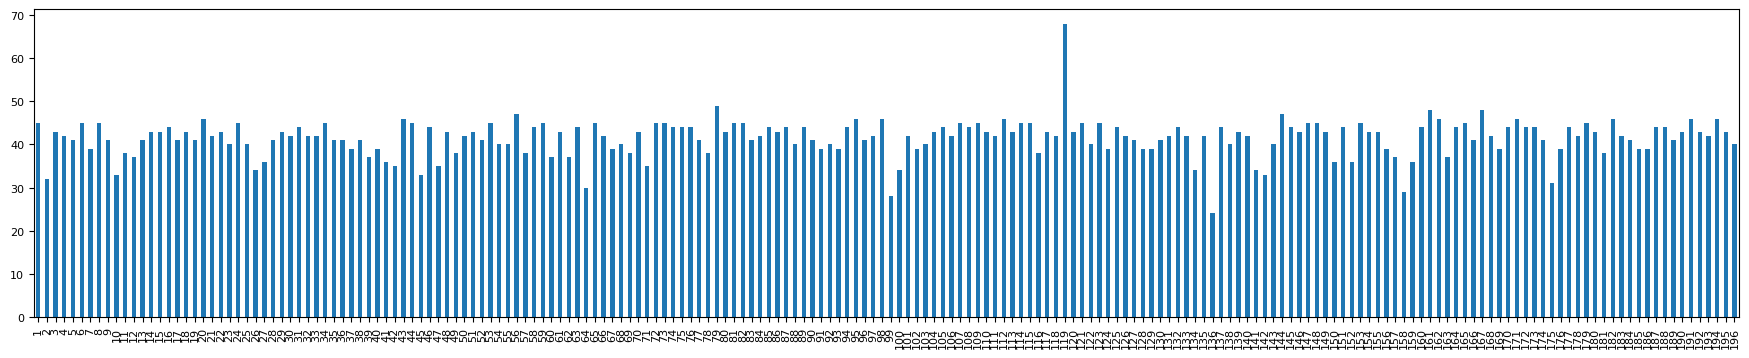

In [ ]:
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
train_annotation_df.img_class.value_counts().sort_index().plot(kind='bar')

In [ ]:
train_annotation_value_counts_df = train_annotation_df.img_class.value_counts().sort_index()
maxidx = train_annotation_value_counts_df.idxmax()
print("Max images of class in train_annotations:",carnamesmakeclass_df.loc[maxidx]['carname_make'],"with ",train_annotation_value_counts_df.loc[maxidx],"images count, img_class=",maxidx)


Max images of class in train_annotations: GMC Savana Van 2012 with  68 images count, img_class= 119


In [ ]:
train_annotation_value_counts_df = train_annotation_df.img_class.value_counts().sort_index()
minidx = train_annotation_value_counts_df.idxmin()
print("Minimum images of class in train_annotations:",carnamesmakeclass_df.loc[minidx]['carname_make'],"with ",train_annotation_value_counts_df.loc[minidx],"images count, img_class=",minidx)

Minimum images of class in train_annotations: Hyundai Accent Sedan 2012 with  24 images count, img_class= 136



--------------------------------------------------

Viewing Training image data

                    Class Train_Image_name  Train_Height  Train_Width
0  Buick Rainier SUV 2007    02181 (1).jpg           431          575
1  Buick Rainier SUV 2007    00193 (1).jpg           768         1024
2  Buick Rainier SUV 2007    02149 (1).jpg           480          640
3  Buick Rainier SUV 2007    03007 (1).jpg           210          300
4  Buick Rainier SUV 2007    01945 (1).jpg           153          264

--------------------------------------------------

--------------------------------------------------

Pixel Data of Train Images: Size and Aspect Ratio
                    Class Train_Image_name  Train_Height  Train_Width  Train_size  Train_Aspect_ratio
0  Buick Rainier SUV 2007    02181 (1).jpg           431          575      743475                1.33
1  Buick Rainier SUV 2007    00193 (1).jpg           768         1024     2359296                1.33
2  Buick Rainier SUV 2007    02149 (1

<ipython-input-25-b731981b5b60>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


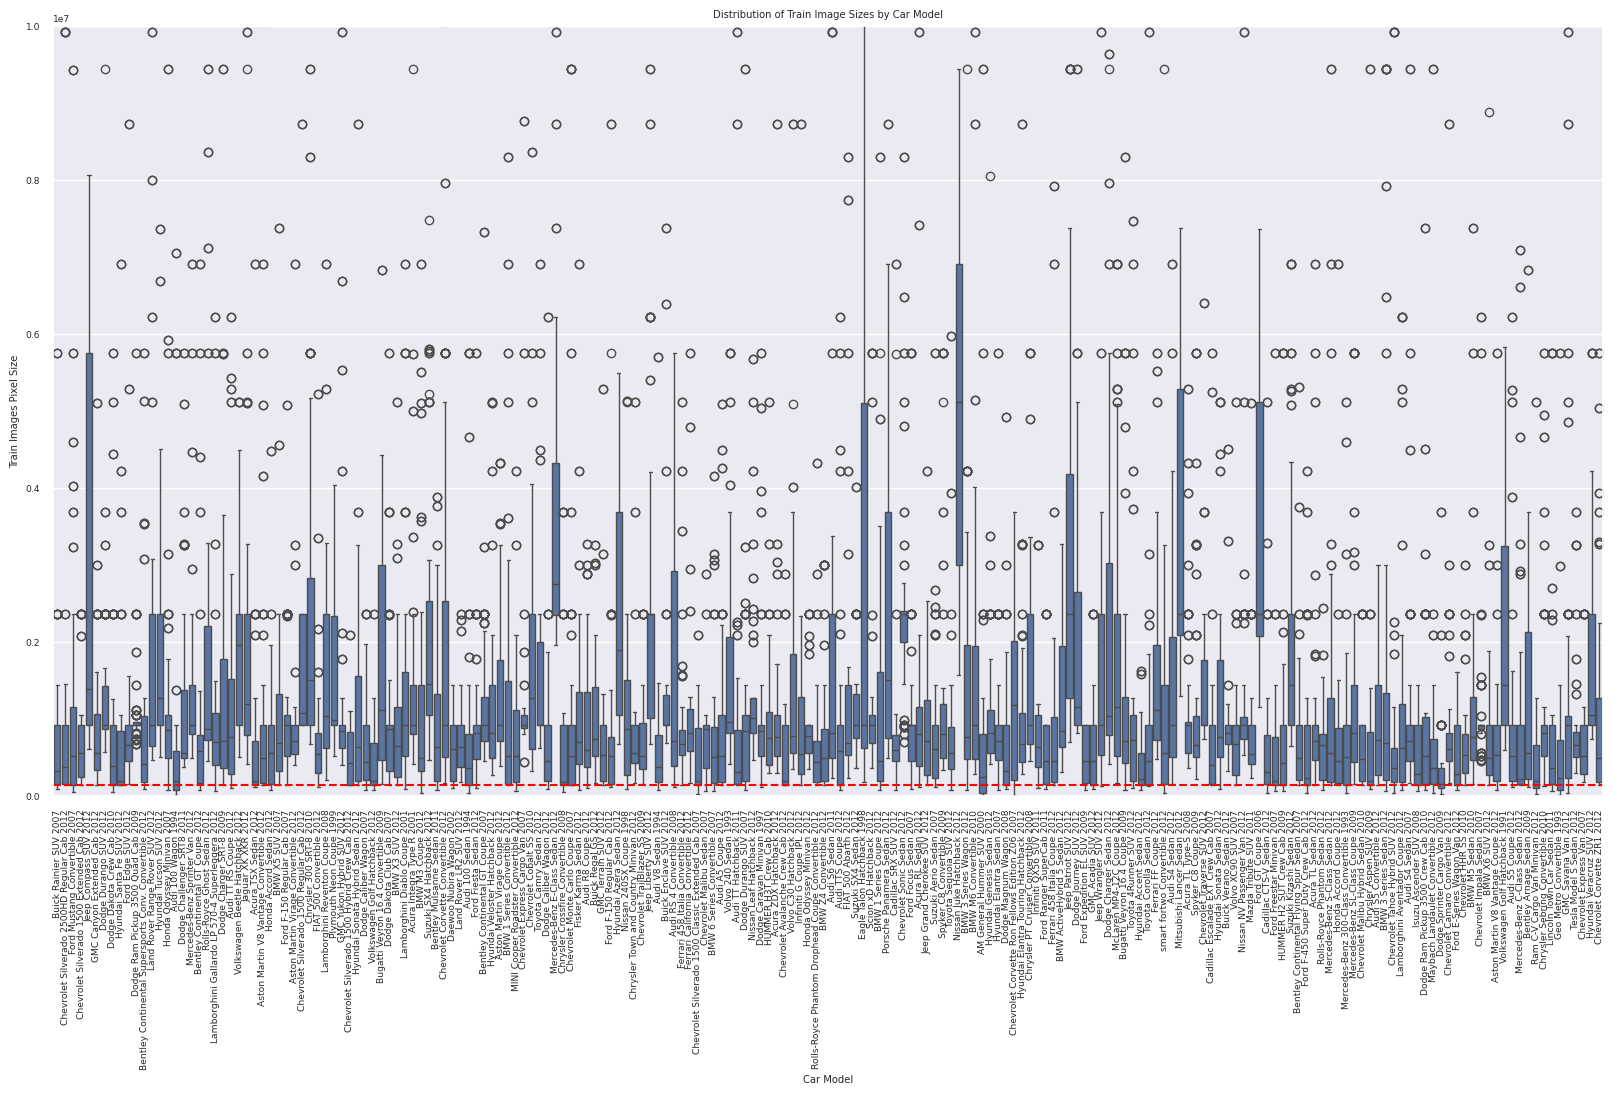


--------------------------------------------------
Statistical data of Train image dataset
                      count          mean           std       min        25%        50%         75%          max
Train_Height        16204.0  4.756788e+02  2.985182e+02     57.00     288.00     420.00      534.00      3744.00
Train_Width         16204.0  6.898465e+02  4.245737e+02     78.00     425.00     630.00      800.00      5616.00
Train_size          16204.0  1.353529e+06  2.290445e+06  13572.00  363000.00  793650.00  1279200.00  63078912.00
Train_Aspect_ratio  16204.0  1.472971e+00  2.338203e-01      0.59       1.33       1.35        1.52         3.89

--------------------------------------------------

--------------------------------------------------
Car model wise Mean and Standard Deviation of Train image dataset
                        Class  Height_mean  Height_std  Width_mean   Width_std     Size_mean      Size_std   AR_mean    AR_std
0  AM General Hummer SUV 2000   324.606742  33

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Extracting Train dataset image size

#Function for creating dataframe by reading through Train image folders
def get_image_sizes_all(root_folder):
    data = {'Class': [], 'Train_Image_name':[], 'Train_Height': [], 'Train_Width': []}

    # Limit iteration to the first num_datasets folders
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    height, width, _ = image.shape  # Get height and width
                    data['Class'].append(class_folder)
                    data['Train_Height'].append(height)
                    data['Train_Width'].append(width)
                    data['Train_Image_name'].append(image_file)

    return pd.DataFrame(data)

#storing image folder name; image file name; height; and width in Train_pixel_all dataframe and then storing it in google drive as "final_Train_pixel_data"
train_pixel_all = get_image_sizes_all(train_images_folder)
# os.chdir(project_path)
# train_pixel_all.to_csv("final_Train_pixel_data.csv", index=False)

train_px_plot = train_pixel_all.copy()        #creating a copy of Train image size dataframe for further calculations

print("\n"+"-" * 50)
print('\nViewing Training image data\n')
print(train_px_plot.head().to_string())
print("\n"+"-" * 50)

train_px_plot['Train_size']=train_px_plot['Train_Height']*train_px_plot['Train_Width']*3        #calculating pixel size for RGB channel: Height*Width*3
train_px_plot['Train_Aspect_ratio'] = round(train_px_plot['Train_Width']/train_px_plot['Train_Height'],2)       # Calculating aspect ratio of each image


print("\n"+"-" * 50)
print("\nPixel Data of Train Images: Size and Aspect Ratio")
print(train_px_plot[0:5].to_string())
print("\n"+"-" * 50)


#Creating box plot of image size for 196 car classes
plt.figure(figsize=(20, 10))
sns.set(font_scale=0.6)

ax = sns.boxplot(y=train_px_plot['Train_size'], x=train_px_plot['Class'], data=train_px_plot, orient="v")
ax.set_title("Distribution of Train Image Sizes by Car Model")
ax.set_ylabel("Train Images Pixel Size")
ax.set_xlabel("Car Model")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 1e7)
ax.axhline(y=224*224*3, color='red', linestyle='--')        #dotted red line to show the images size below 224*224*3
plt.show()


print("\n"+"-" * 50)
print('Statistical data of Train image dataset')
print(train_px_plot.describe().T.to_string())
print("\n"+"-" * 50)


#calculating mean and standar deviation of image dataset of each class. This will help us get a birds eye view of image data available with us
train_px_stats = train_px_plot.groupby('Class').apply(lambda x: pd.Series({
    'Height_mean': x['Train_Height'].mean(),
    'Height_std': x['Train_Height'].std(),
    'Width_mean': x['Train_Width'].mean(),
    'Width_std': x['Train_Width'].std(),
    'Size_mean': x['Train_size'].mean(),
    'Size_std': x['Train_size'].std(),
    'AR_mean': x['Train_Aspect_ratio'].mean(),
    'AR_std': x['Train_Aspect_ratio'].std()
})).reset_index()

print("\n"+"-" * 50)
print('Car model wise Mean and Standard Deviation of Train image dataset')
print(train_px_stats.head().to_string())
print("\n"+"-" * 50)

print("\n"+"-" * 50)
print('Statistical information of Training data - Car model wise mean and std deviation')
print(train_px_stats.describe().T.to_string())
print("\n"+"-" * 50)


--------------------------------------------------

Viewing testing image data

                    Class Test_Image_name  Test_Height  Test_Width
0  Dodge Durango SUV 2012       02057.jpg          480         640
1  Dodge Durango SUV 2012       02446.jpg          492         786
2  Dodge Durango SUV 2012       07474.jpg          480         640
3  Dodge Durango SUV 2012       03954.jpg          480         640
4  Dodge Durango SUV 2012       00875.jpg          768        1024

--------------------------------------------------

--------------------------------------------------

Pixel Data of test Images: Size and Aspect Ratio
                    Class Test_Image_name  Test_Height  Test_Width  Test_size  Test_Aspect_ratio
0  Dodge Durango SUV 2012       02057.jpg          480         640     921600               1.33
1  Dodge Durango SUV 2012       02446.jpg          492         786    1160136               1.60
2  Dodge Durango SUV 2012       07474.jpg          480         640     9

<ipython-input-26-6d1672575067>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


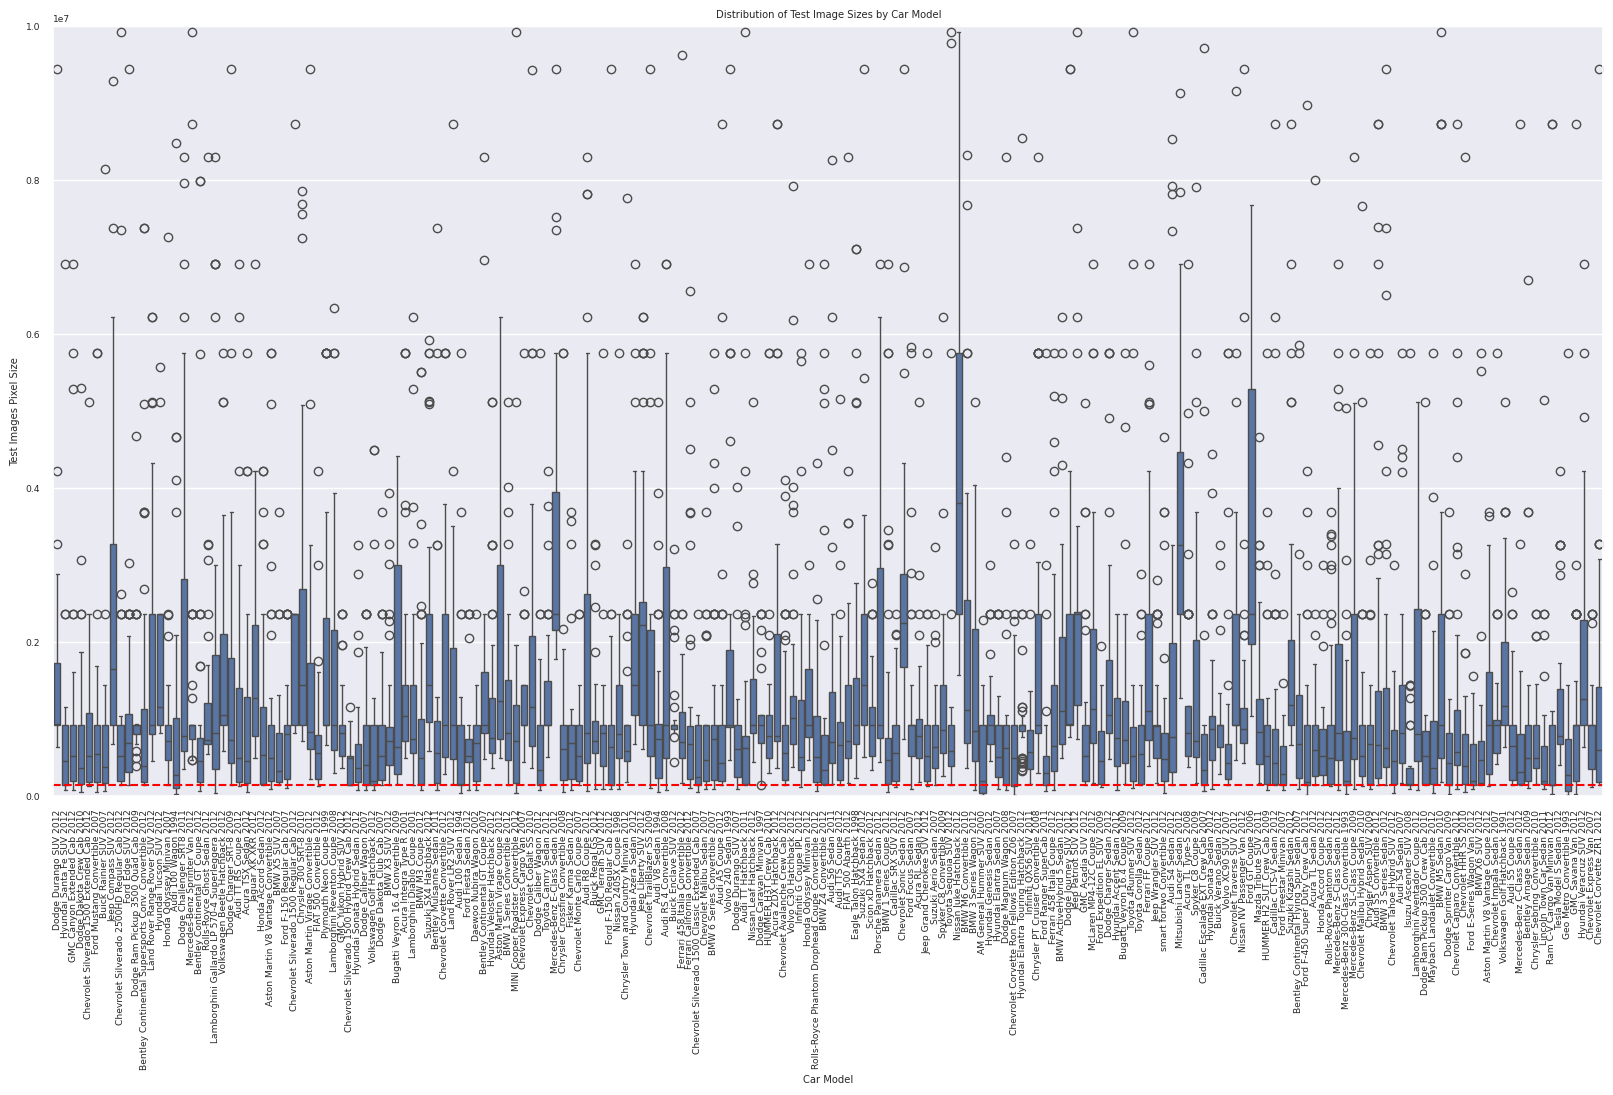


--------------------------------------------------
Statistical data of test image dataset
                    count          mean           std      min        25%        50%         75%           max
Test_Height        8152.0  4.824214e+02  3.180107e+02     41.0     288.00     426.00      540.00  5.400000e+03
Test_Width         8152.0  6.992989e+02  4.540969e+02     78.0     429.00     640.00      800.00  7.800000e+03
Test_size          8152.0  1.434129e+06  2.997850e+06  12423.0  372510.00  810420.00  1322867.25  1.263600e+08
Test_Aspect_ratio  8152.0  1.470034e+00  2.297378e-01      0.6       1.33       1.34        1.52  3.610000e+00

--------------------------------------------------

--------------------------------------------------
Car model wise Mean and Standard Deviation of test image dataset
                        Class  Height_mean  Height_std  Width_mean   Width_std     Size_mean      Size_std   AR_mean    AR_std
0  AM General Hummer SUV 2000   268.045455  193.193114  39

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Extracting test dataset image size

#Function for creating dataframe by reading through test image folders
def get_image_sizes_all(root_folder):
    data = {'Class': [], 'Test_Image_name':[], 'Test_Height': [], 'Test_Width': []}

    # Limit iteration to the first num_datasets folders
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    height, width, _ = image.shape  # Get height and width
                    data['Class'].append(class_folder)
                    data['Test_Height'].append(height)
                    data['Test_Width'].append(width)
                    data['Test_Image_name'].append(image_file)

    return pd.DataFrame(data)

#storing image folder name; image file name; height; and width in test_pixel_all dataframe and then storing it in google drive as "final_test_pixel_data"
test_pixel_all = get_image_sizes_all(test_images_folder)
#os.chdir(project_path)
#test_pixel_all.to_csv("final_test_pixel_data.csv", index=False)

test_px_plot = test_pixel_all.copy()        #creating a copy of test image size dataframe for further calculations

print("\n"+"-" * 50)
print('\nViewing testing image data\n')
print(test_px_plot.head())
print("\n"+"-" * 50)
\
test_px_plot['Test_size']=test_px_plot['Test_Height']*test_px_plot['Test_Width']*3        #calculating pixel size for RGB channel: Height*Width*3
test_px_plot['Test_Aspect_ratio'] = round(test_px_plot['Test_Width']/test_px_plot['Test_Height'],2)       # Calculating aspect ratio of each image


print("\n"+"-" * 50)
print("\nPixel Data of test Images: Size and Aspect Ratio")
print(test_px_plot[0:5].to_string())
print("\n"+"-" * 50)


#Creating box plot of image size for 196 car classes
plt.figure(figsize=(20, 10))
sns.set(font_scale=0.6)

ax = sns.boxplot(y=test_px_plot['Test_size'], x=test_px_plot['Class'], data=test_px_plot, orient="v")
ax.set_title("Distribution of Test Image Sizes by Car Model")
ax.set_ylabel("Test Images Pixel Size")
ax.set_xlabel("Car Model")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 1e7)
ax.axhline(y=224*224*3, color='red', linestyle='--')        #dotted red line to show the test images size below 224*224*3
plt.show()


print("\n"+"-" * 50)
print('Statistical data of test image dataset')
print(test_px_plot.describe().T.to_string())
print("\n"+"-" * 50)


#calculating mean and standar deviation of image dataset of each class. This will help us get a birds eye view of image data available with us
test_px_stats = test_px_plot.groupby('Class').apply(lambda x: pd.Series({
    'Height_mean': x['Test_Height'].mean(),
    'Height_std': x['Test_Height'].std(),
    'Width_mean': x['Test_Width'].mean(),
    'Width_std': x['Test_Width'].std(),
    'Size_mean': x['Test_size'].mean(),
    'Size_std': x['Test_size'].std(),
    'AR_mean': x['Test_Aspect_ratio'].mean(),
    'AR_std': x['Test_Aspect_ratio'].std()
})).reset_index()

print("\n"+"-" * 50)
print('Car model wise Mean and Standard Deviation of test image dataset')
print(test_px_stats.head().to_string())
print("\n"+"-" * 50)

print("\n"+"-" * 50)
print('Statistical information of Testing image - Car model wise mean and std deviation')
print(test_px_stats.describe().T.to_string())
print("\n"+"-" * 50)

In [ ]:
#‣Step 2: Map training and testing images to its classes. [ 6 points ]
#‣Step 3: Map training and testing images to its annotations. [ 6 points ]

In [ ]:
#Load Training Images
train_images = []
train_labels = []
train_bb = []
train_class = []
train_carnamemake = []
for index,row in train_annotation_df.iterrows():
  if row['img_class'] <= maxnbr_classes:
    train_imagepath = train_images_folder+carnamesmakeclass_df.loc[row['img_class'],"carname_make"]+"/"+row["img_filename"]
    train_img = cv2.imread(train_imagepath)
    h = train_img.shape[0]
    w = train_img.shape[1]
    w_scale = img_width/w
    h_scale = img_height/h
    train_img = cv2.resize(train_img, (img_width, img_height))
    train_images.append(train_img)
    train_labels.append(row['img_class'])
    x1 = int(np.round(row['x1'] * w_scale))
    y1 = int(np.round(row['y1'] * h_scale))
    x2 = int(np.round(row['x2'] * w_scale))
    y2 = int(np.round(row['y2'] * h_scale))
    coords = []
    coords.append(x1)
    coords.append(y1)
    coords.append(x2)
    coords.append(y2)
    train_bb.append(coords)
    train_class.append(row['img_class'])
    train_carnamemake.append(carnamesmakeclass_df.loc[row['img_class'],"carname_make"])
    print("...index:",index," class:",row['img_class'])
    #print("...............index:",index," class:",row['img_class']," train_image shape:", train_img.shape," train_imagepath:",train_imagepath,"........")
    #print("...............index:",index,"w:",w,"h:",h,"w_scale:",w_scale,"h_scale:",h_scale,"orig_x1:",row['x1'],x1,"orig_y1:",row['y1'],y1,"orig_x2:",row['x2'],x2,"orig_y2:",row['y2'],y2,"........")

train_images_arr = np.array(train_images)
train_labels_arr = np.array(train_labels)
train_bb_arr = np.array(train_bb)
train_class_arr = np.array(train_class)
train_carnamemake_arr = np.array(train_carnamemake)

print("train_images_arr shape:",train_images_arr.shape)
print("train_labels_arr shape:",train_labels_arr.shape)
print("train_bb_arr shape:",train_bb_arr.shape)
print("train_class_arr shape:",train_class_arr.shape)
print("train_carnamemake_arr shape:",train_carnamemake_arr.shape)

...index: 0  class: 14
...index: 1  class: 3
...index: 16  class: 14
...index: 40  class: 13
...index: 52  class: 15
...index: 64  class: 8
...index: 68  class: 5
...index: 80  class: 8
...index: 127  class: 13
...index: 149  class: 8
...index: 150  class: 5
...index: 162  class: 1
...index: 197  class: 6
...index: 199  class: 16
...index: 200  class: 12
...index: 205  class: 11
...index: 207  class: 8
...index: 220  class: 10
...index: 235  class: 7
...index: 238  class: 16
...index: 243  class: 7
...index: 254  class: 6
...index: 260  class: 16
...index: 288  class: 15
...index: 291  class: 10
...index: 307  class: 6
...index: 310  class: 15
...index: 317  class: 11
...index: 319  class: 7
...index: 339  class: 9
...index: 369  class: 10
...index: 373  class: 6
...index: 391  class: 4
...index: 404  class: 10
...index: 409  class: 5
...index: 410  class: 14
...index: 423  class: 5
...index: 424  class: 7
...index: 449  class: 15
...index: 461  class: 1
...index: 466  class: 14
...ind

In [ ]:
#Load Test Images
test_images = []
test_labels = []
test_bb = []
test_class = []
test_carnamemake = []
for index,row in test_annotation_df.iterrows():
  if row['img_class'] <= maxnbr_classes:
    test_imagepath = test_images_folder+carnamesmakeclass_df.loc[row['img_class'],"carname_make"]+"/"+row["img_filename"]
    test_img = cv2.imread(test_imagepath)
    h = test_img.shape[0]
    w = test_img.shape[1]
    w_scale = img_width/w
    h_scale = img_height/h
    test_img = cv2.resize(test_img, (img_width, img_height))
    test_images.append(test_img)
    test_labels.append(row['img_class'])
    x1 = int(np.round(row['x1'] * w_scale))
    y1 = int(np.round(row['y1'] * h_scale))
    x2 = int(np.round(row['x2'] * w_scale))
    y2 = int(np.round(row['y2'] * h_scale))
    coords = []
    coords.append(x1)
    coords.append(y1)
    coords.append(x2)
    coords.append(y2)
    test_bb.append(coords)
    test_class.append(row['img_class'])
    test_carnamemake.append(carnamesmakeclass_df.loc[row['img_class'],"carname_make"])
    print("...index:",index," class:",row['img_class'])
    #print("...............index:",index," class:",row['img_class']," test_image shape:", test_img.shape," test_imagepath:",test_imagepath,"........")
    #print("...............index:",index,"w:",w,"h:",h,"w_scale:",w_scale,"h_scale:",h_scale,"orig_x1:",row['x1'],x1,"orig_y1:",row['y1'],y1,"orig_x2:",row['x2'],x2,"orig_y2:",row['y2'],y2,"........")

test_images_arr = np.array(test_images)
test_labels_arr = np.array(test_labels)
test_bb_arr = np.array(test_bb)
test_class_arr = np.array(test_class)
test_carnamemake_arr = np.array(test_carnamemake)

print("test_images_arr shape:",test_images_arr.shape)
print("test_labels_arr shape:",test_labels_arr.shape)
print("test_bb_arr shape:",test_bb_arr.shape)
print("test_class_arr shape:",test_class_arr.shape)
print("test_carnamemake_arr shape:",test_carnamemake_arr.shape)

...index: 21  class: 4
...index: 29  class: 5
...index: 35  class: 7
...index: 42  class: 3
...index: 75  class: 1
...index: 84  class: 7
...index: 111  class: 12
...index: 118  class: 9
...index: 127  class: 6
...index: 129  class: 6
...index: 136  class: 4
...index: 148  class: 14
...index: 154  class: 14
...index: 157  class: 10
...index: 165  class: 10
...index: 182  class: 2
...index: 200  class: 14
...index: 213  class: 9
...index: 231  class: 10
...index: 238  class: 8
...index: 248  class: 2
...index: 250  class: 7
...index: 281  class: 3
...index: 293  class: 14
...index: 301  class: 13
...index: 308  class: 15
...index: 313  class: 3
...index: 325  class: 11
...index: 328  class: 3
...index: 346  class: 2
...index: 352  class: 8
...index: 385  class: 6
...index: 388  class: 15
...index: 396  class: 3
...index: 419  class: 13
...index: 425  class: 8
...index: 448  class: 13
...index: 456  class: 1
...index: 457  class: 11
...index: 458  class: 2
...index: 466  class: 9
...inde

In [ ]:
print("# Train labels:",len(np.unique(train_labels_arr)))
print("Train labels:",np.unique(train_labels_arr))

print("# Test labels:",len(np.unique(test_labels_arr)))
print("Test labels:",np.unique(test_labels_arr))

# Train labels: 16
Train labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
# Test labels: 16
Test labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
print("train_labels_arr.shape:",train_labels_arr.shape)
print("test_labels_arr.shape:",test_labels_arr.shape)

train_labels_arr.shape: (652,)
test_labels_arr.shape: (646,)


In [ ]:
#‣Step 4: Display images with bounding box. [ 5 points ]

1 :TRAIN: Car Name & make: Audi TTS Coupe 2012
1 :TRAIN: Bounding Box Coords:
1 BB:(x1,y1): ( 15 , 65 )
1 BB:(x2,y2): ( 212 , 210 )


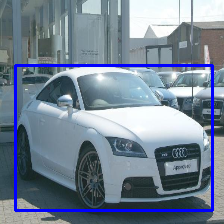



2 :TRAIN: Car Name & make: Acura TL Sedan 2012
2 :TRAIN: Bounding Box Coords:
2 BB:(x1,y1): ( 9 , 38 )
2 BB:(x2,y2): ( 216 , 195 )


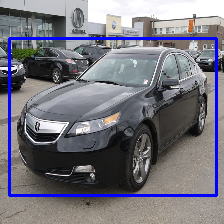



3 :TRAIN: Car Name & make: Audi TTS Coupe 2012
3 :TRAIN: Bounding Box Coords:
3 BB:(x1,y1): ( 34 , 60 )
3 BB:(x2,y2): ( 202 , 173 )


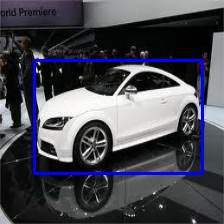



4 :TRAIN: Car Name & make: Audi A5 Coupe 2012
4 :TRAIN: Bounding Box Coords:
4 BB:(x1,y1): ( 21 , 26 )
4 BB:(x2,y2): ( 198 , 190 )


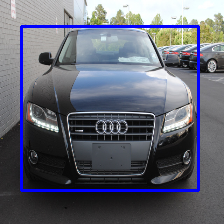



5 :TRAIN: Car Name & make: Audi R8 Coupe 2012
5 :TRAIN: Bounding Box Coords:
5 BB:(x1,y1): ( 72 , 114 )
5 BB:(x2,y2): ( 190 , 183 )


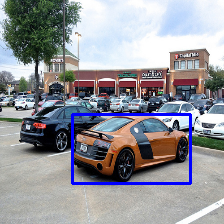

In [ ]:
# Visualizing the first 5 training images in the dataset and their labels
N = 5
for i in range(N):
  img = train_images_arr[i]
  x1 = train_bb_arr[i][0]
  y1 = train_bb_arr[i][1]
  x2 = train_bb_arr[i][2]
  y2 = train_bb_arr[i][3]
  print(i+1,":TRAIN: Car Name & make:",train_carnamemake[i])
  print(i+1,":TRAIN: Bounding Box Coords:")
  print(i+1,"BB:(x1,y1):","(",x1,",",y1,")")
  print(i+1,"BB:(x2,y2):","(",x2,",",y2,")")
  cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
  cv2_imshow(img)
  print("\n")

1 :TEST: Car Name & make: Acura TL Type-S 2008
1 :TEST: Bounding Box Coords:
1 BB:(x1,y1): ( 5 , 42 )
1 BB:(x2,y2): ( 221 , 195 )


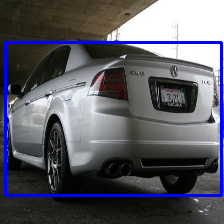



2 :TEST: Car Name & make: Acura TSX Sedan 2012
2 :TEST: Bounding Box Coords:
2 BB:(x1,y1): ( 20 , 46 )
2 BB:(x2,y2): ( 212 , 211 )


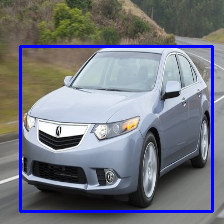



3 :TEST: Car Name & make: Acura ZDX Hatchback 2012
3 :TEST: Bounding Box Coords:
3 BB:(x1,y1): ( 10 , 79 )
3 BB:(x2,y2): ( 214 , 208 )


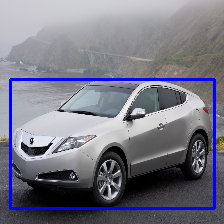



4 :TEST: Car Name & make: Acura TL Sedan 2012
4 :TEST: Bounding Box Coords:
4 BB:(x1,y1): ( 37 , 56 )
4 BB:(x2,y2): ( 192 , 194 )


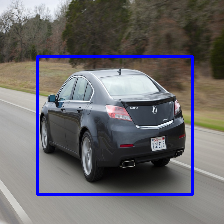



5 :TEST: Car Name & make: AM General Hummer SUV 2000
5 :TEST: Bounding Box Coords:
5 BB:(x1,y1): ( 26 , 46 )
5 BB:(x2,y2): ( 196 , 210 )


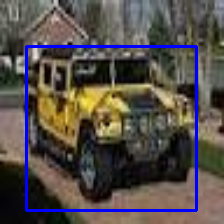

In [ ]:
# Visualizing the first 5 test images in the dataset and their labels
N = 5
for i in range(N):
  img = test_images_arr[i]
  x1 = test_bb_arr[i][0]
  y1 = test_bb_arr[i][1]
  x2 = test_bb_arr[i][2]
  y2 = test_bb_arr[i][3]
  print(i+1,":TEST: Car Name & make:",test_carnamemake[i])
  print(i+1,":TEST: Bounding Box Coords:")
  print(i+1,"BB:(x1,y1):","(",x1,",",y1,")")
  print(i+1,"BB:(x2,y2):","(",x2,",",y2,")")

  cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
  cv2_imshow(img)
  print("\n")

In [ ]:
train_images_arr = train_images_arr.astype('float32')
train_images_arr_norm = train_images_arr/255

test_images_arr = test_images_arr.astype('float32')
test_images_arr_norm = test_images_arr/255

print('\n Training data',train_images_arr_norm.shape)
print('\n Testing data',test_images_arr_norm.shape)


 Training data (652, 224, 224, 3)

 Testing data (646, 224, 224, 3)


**Machine Learning Model**

Decision Tree Classifier

In [ ]:
x_train = []
for i in range(train_images_arr_norm.shape[0]):
  x_train.append(train_images_arr_norm[i].flatten())

In [ ]:
x_test = []
for i in range(test_images_arr_norm.shape[0]):
  x_test.append(test_images_arr_norm[i].flatten())

In [ ]:
y_train = train_labels_arr
y_test = test_labels_arr

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,classification_report
dtc_model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=15)
dtc_model.fit(x_train,y_train)
y_pred = dtc_model.predict(x_test)

In [ ]:
# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [ ]:
cal_accuracy(y_test,y_pred)

Accuracy :  8.04953560371517
Report :                precision    recall  f1-score   support

           1       0.12      0.14      0.13        44
           2       0.15      0.12      0.14        32
           3       0.07      0.09      0.08        43
           4       0.10      0.12      0.11        42
           5       0.05      0.05      0.05        40
           6       0.12      0.07      0.09        44
           7       0.03      0.03      0.03        39
           8       0.09      0.09      0.09        45
           9       0.04      0.02      0.03        41
          10       0.10      0.09      0.09        33
          11       0.09      0.08      0.08        38
          12       0.09      0.11      0.10        36
          13       0.08      0.07      0.08        41
          14       0.05      0.05      0.05        42
          15       0.04      0.05      0.04        43
          16       0.09      0.12      0.10        43

    accuracy                           0.

In [ ]:
dtc_model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=20)
dtc_model.fit(x_train,y_train)
y_pred = dtc_model.predict(x_test)

In [ ]:
cal_accuracy(y_test,y_pred)

Accuracy :  8.6687306501548
Report :                precision    recall  f1-score   support

           1       0.21      0.18      0.20        44
           2       0.22      0.06      0.10        32
           3       0.04      0.05      0.04        43
           4       0.10      0.38      0.16        42
           5       0.11      0.05      0.07        40
           6       0.07      0.05      0.06        44
           7       0.04      0.05      0.05        39
           8       0.08      0.04      0.06        45
           9       0.06      0.15      0.09        41
          10       0.06      0.03      0.04        33
          11       0.04      0.03      0.03        38
          12       0.00      0.00      0.00        36
          13       0.16      0.12      0.14        41
          14       0.11      0.05      0.07        42
          15       0.12      0.09      0.11        43
          16       0.03      0.02      0.02        43

    accuracy                           0.0

**Convolutional Model 1**
1. Input shape: 224x224, 3 channel
2. Number of classes: 16

* Layer 1: Convolution
  * Number of filters: 32
  * kernel size 3x3
  * Activation function: relu
  * Pooling:2
  * Padding: 0
  * Stride: 1

* Layer 2: Convolution
  * Number of filters: 64
  * kernel size 3x3
  * Activation function: relu
  * Pooling:2
  * Padding: 0
  * Stride: 1

* Layer 3: Convolution
  * Number of filters: 128
  * kernel size 3x3
  * Activation function: relu
  * Pooling:2
  * Padding: 0
  * Stride: 1

* Layer 3: Neural Network
  * Dense Layer units : 128
  * Softmax output units: 16



In [ ]:
model1 = Sequential()

model1.add(Convolution2D(filters=32,kernel_size=3,activation='relu',input_shape=(img_width,img_height,img_channels)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2))

model1.add(Convolution2D(filters=64,kernel_size=3,activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2))

model1.add(Convolution2D(filters=128,kernel_size=3,activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2))

model1.add(Flatten())

model1.add(Dense(units=512,activation='relu'))

model1.add(Dense(units=128,activation='relu'))

model1.add(Dense(units=maxnbr_classes+1,activation='softmax'))

In [ ]:
optimizer = Adam()
model1.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model_1 = model1.fit(train_images_arr_norm, train_labels_arr,epochs=number_of_epochs, validation_data=(test_images_arr_norm, test_labels_arr))

Epoch 1/20
21/21 [==============================] - 168s 8s/step - loss: 15.4339 - accuracy: 0.1028 - val_loss: 6.6276 - val_accuracy: 0.0573
Epoch 2/20
21/21 [==============================] - 148s 7s/step - loss: 6.1407 - accuracy: 0.2193 - val_loss: 10.9914 - val_accuracy: 0.0650
Epoch 3/20
21/21 [==============================] - 149s 7s/step - loss: 2.7548 - accuracy: 0.3021 - val_loss: 15.1896 - val_accuracy: 0.0619
Epoch 4/20
21/21 [==============================] - 147s 7s/step - loss: 2.0046 - accuracy: 0.4156 - val_loss: 14.5727 - val_accuracy: 0.0697
Epoch 5/20
21/21 [==============================] - 134s 6s/step - loss: 1.5007 - accuracy: 0.5368 - val_loss: 13.2246 - val_accuracy: 0.0867
Epoch 6/20
21/21 [==============================] - 146s 7s/step - loss: 1.0874 - accuracy: 0.6580 - val_loss: 14.0130 - val_accuracy: 0.0774
Epoch 7/20
21/21 [==============================] - 148s 7s/step - loss: 0.7848 - accuracy: 0.7331 - val_loss: 14.0561 - val_accuracy: 0.0728
Epoch 

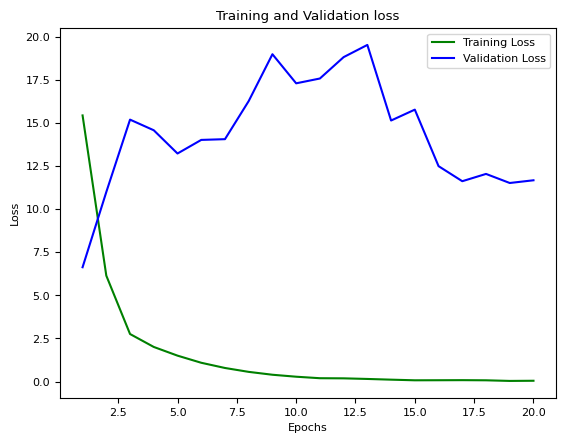

In [ ]:
EPOCH=number_of_epochs
loss_train = model_1.history['loss']
loss_val = model_1.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

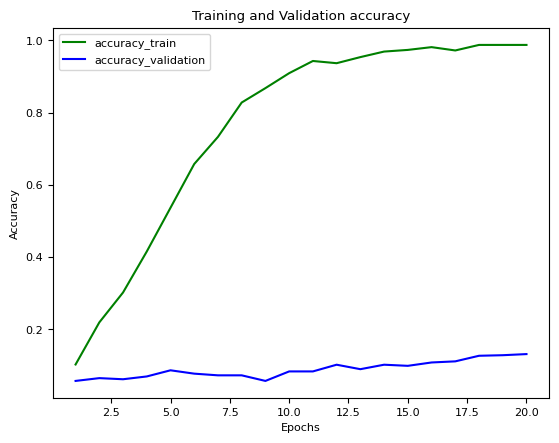

In [ ]:
EPOCH=number_of_epochs
accuracy_train = model_1.history['accuracy']
accuracy_val = model_1.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs,accuracy_train,'g',label='accuracy_train')
plt.plot(epochs,accuracy_val,'b',label='accuracy_validation')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del model1
del model_1

**Convolutional Model 2**
1. Input shape: 224x224, 3 channel
2. Number of classes: 16

* Layer 1: Convolution
  * Number of filters: 64
  * kernel size 3x3
  * Activation function: relu
  * Pooling:3
  * Padding: 0
  * Stride: 1

* Layer 2: Convolution
  * Number of filters: 128
  * kernel size 3x3
  * Activation function: relu
  * Pooling:3
  * Padding: 0
  * Stride: 1

* Layer 3: Convolution
  * Number of filters: 256
  * kernel size 3x3
  * Activation function: relu
  * Pooling:3
  * Padding: 0
  * Stride: 1

  * Layer 3: Convolution
  * Number of filters: 128
  * kernel size 3x3
  * Activation function: relu
  * Pooling:3
  * Padding: 0
  * Stride: 1

* Layer 4: Neural Network
  * Dense Layer units : 128
  * Dense Layer units : 64
  * Softmax output units: 16

In [ ]:
model2 = Sequential()

model2.add(Convolution2D(filters=64,kernel_size=3,activation='relu',input_shape=(img_width,img_height,img_channels)))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=3))


model2.add(Convolution2D(filters=128,kernel_size=3,activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=3))

model2.add(Convolution2D(filters=256,kernel_size=3,activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=3))

model2.add(Flatten())

model2.add(Dense(units=256,activation='relu'))

model2.add(Dense(units=128,activation='relu'))

model2.add(Dense(units=32,activation='relu'))

model2.add(Dense(units=maxnbr_classes+1,activation='softmax'))

In [ ]:
optimizer = Adam()
model2.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_3 (Bat  (None, 222, 222, 64)      256       
 chNormalization)                                                
                                                                 
 average_pooling2d (Average  (None, 74, 74, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_4 (Bat  (None, 72, 72, 128)       512       
 chNormalization)                                                
                                                      

In [ ]:
model_2 = model2.fit(train_images_arr_norm,train_labels_arr,epochs=number_of_epochs,validation_data=(test_images_arr_norm,test_labels_arr))

Epoch 1/20
21/21 [==============================] - 167s 8s/step - loss: 3.0837 - accuracy: 0.1089 - val_loss: 2.8569 - val_accuracy: 0.0650
Epoch 2/20
21/21 [==============================] - 156s 7s/step - loss: 2.7251 - accuracy: 0.1442 - val_loss: 2.8950 - val_accuracy: 0.0960
Epoch 3/20
21/21 [==============================] - 154s 7s/step - loss: 2.5013 - accuracy: 0.1994 - val_loss: 3.3156 - val_accuracy: 0.0882
Epoch 4/20
21/21 [==============================] - 155s 7s/step - loss: 2.2869 - accuracy: 0.2699 - val_loss: 3.1483 - val_accuracy: 0.0774
Epoch 5/20
21/21 [==============================] - 154s 7s/step - loss: 2.0891 - accuracy: 0.3298 - val_loss: 3.4627 - val_accuracy: 0.0681
Epoch 6/20
21/21 [==============================] - 151s 7s/step - loss: 1.7888 - accuracy: 0.4233 - val_loss: 4.1523 - val_accuracy: 0.0836
Epoch 7/20
21/21 [==============================] - 153s 7s/step - loss: 1.5217 - accuracy: 0.5077 - val_loss: 6.4983 - val_accuracy: 0.0619
Epoch 8/20
21

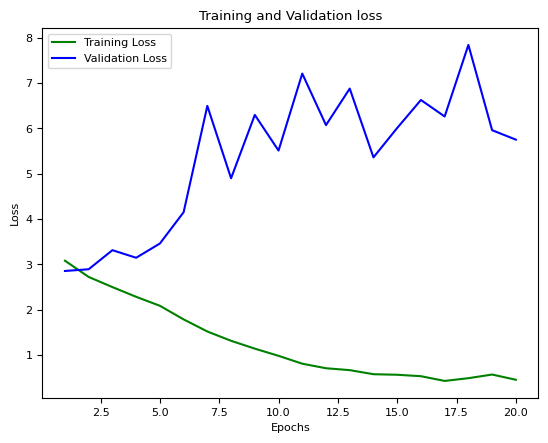

In [ ]:
EPOCH=number_of_epochs
loss_train = model_2.history['loss']
loss_val = model_2.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

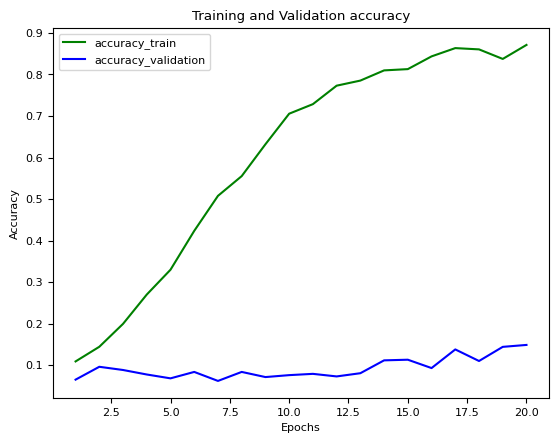

In [ ]:
EPOCH=number_of_epochs
accuracy_train = model_2.history['accuracy']
accuracy_val = model_2.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs,accuracy_train,'g',label='accuracy_train')
plt.plot(epochs,accuracy_val,'b',label='accuracy_validation')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del model2
del model_2

**Convolutional Model 3**
1. Input shape: 224x224, 3 channel
2. Number of classes: 16

* Layer 1: Convolution
  * Number of filters: 64
  * kernel size 3x3
  * Activation function: relu
  * Padding: 0
  * Stride: 1

* Layer 2: Convolution
  * Number of filters: 128
  * kernel size 3x3
  * Activation function: relu
  * Pooling:0
  * Padding: 0
  * Stride: 1

* Layer 3: Convolution
  * Number of filters: 256
  * kernel size 3x3
  * Activation function: relu
  * Pooling:0
  * Padding: 0
  * Stride: 1

* Layer 4: Convolution
  * Number of filters: 512
  * kernel size 3x3
  * Activation function: relu
  * Pooling:2
  * Padding: 0
  * Stride: 1

* Layer 5: Convolution
  * Number of filters: 512
  * kernel size 3x3
  * Activation function: relu
  * Pooling:2
  * Padding: 0
  * Stride: 1

* Layer 6: Neural Network
  * Dense Layer units : 256
  * Dense Layer units : 128
  * Dense Layer units : 64
  * Dense Layer units : 32
  * Softmax output units: 16

In [ ]:
model3 = Sequential()

model3.add(Convolution2D(filters=64,kernel_size=3,activation='relu',input_shape=(img_width,img_height,img_channels)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=3))

model3.add(Convolution2D(filters=128,kernel_size=3,activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=3))

model3.add(Convolution2D(filters=256,kernel_size=3,activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))

model3.add(Convolution2D(filters=512,kernel_size=3,activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=2))

model3.add(Flatten())

model3.add(Dense(units=512,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(units=256,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(units=128,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(units=32,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(units=maxnbr_classes+1,activation='softmax'))

In [ ]:
optimizer = Adam()
model3.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_19 (Ba  (None, 222, 222, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_20 (Ba  (None, 72, 72, 128)       512       
 tchNormalization)                                               
                                                      

In [ ]:
model_3 = model3.fit(train_images_arr_norm,train_labels_arr,epochs=number_of_epochs,validation_data=(test_images_arr_norm,test_labels_arr))

Epoch 1/20
21/21 [==============================] - 173s 8s/step - loss: 3.3233 - accuracy: 0.0813 - val_loss: 3.4213 - val_accuracy: 0.0108
Epoch 2/20
21/21 [==============================] - 168s 8s/step - loss: 2.8544 - accuracy: 0.1503 - val_loss: 4.6261 - val_accuracy: 0.0000e+00
Epoch 3/20
21/21 [==============================] - 171s 8s/step - loss: 2.7283 - accuracy: 0.1718 - val_loss: 4.4046 - val_accuracy: 0.0046
Epoch 4/20
21/21 [==============================] - 169s 8s/step - loss: 2.5794 - accuracy: 0.1994 - val_loss: 3.8112 - val_accuracy: 0.0619
Epoch 5/20
21/21 [==============================] - 169s 8s/step - loss: 2.4259 - accuracy: 0.2071 - val_loss: 3.5174 - val_accuracy: 0.0604
Epoch 6/20
21/21 [==============================] - 168s 8s/step - loss: 2.3656 - accuracy: 0.2515 - val_loss: 3.6314 - val_accuracy: 0.0511
Epoch 7/20
21/21 [==============================] - 168s 8s/step - loss: 2.3078 - accuracy: 0.2699 - val_loss: 3.3037 - val_accuracy: 0.0712
Epoch 8/2

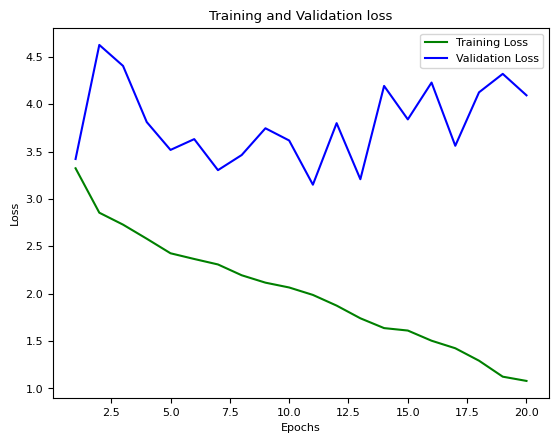

In [ ]:
EPOCH=number_of_epochs
loss_train = model_3.history['loss']
loss_val = model_3.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

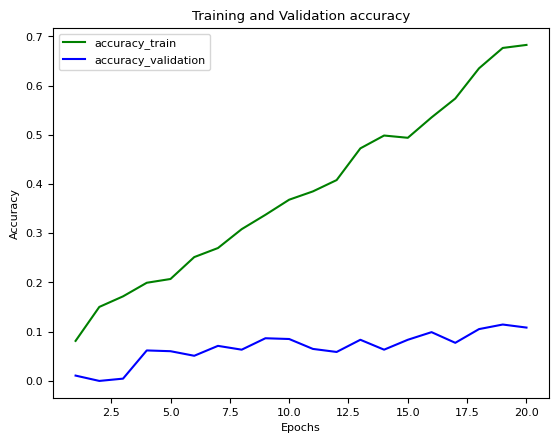

In [ ]:
EPOCH=number_of_epochs
accuracy_train = model_3.history['accuracy']
accuracy_val = model_3.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs,accuracy_train,'g',label='accuracy_train')
plt.plot(epochs,accuracy_val,'b',label='accuracy_validation')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del model3
del model_3

**RESNET50 CNN IMPLEMENTATION**

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

<ipython-input-219-8f4960495e8a>:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_4 = model4.fit_generator(


Epoch 1/20
40/40 [==============================] - 279s 7s/step - loss: 2.9595 - accuracy: 0.0566 - val_loss: 2.9609 - val_accuracy: 0.0656
Epoch 2/20
40/40 [==============================] - 268s 7s/step - loss: 2.9005 - accuracy: 0.0456 - val_loss: 2.8447 - val_accuracy: 0.0688
Epoch 3/20
40/40 [==============================] - 251s 6s/step - loss: 2.8794 - accuracy: 0.0519 - val_loss: 2.8303 - val_accuracy: 0.0641
Epoch 4/20
40/40 [==============================] - 267s 7s/step - loss: 2.8379 - accuracy: 0.0645 - val_loss: 2.7923 - val_accuracy: 0.0688
Epoch 5/20
40/40 [==============================] - 244s 6s/step - loss: 2.8183 - accuracy: 0.0472 - val_loss: 2.8091 - val_accuracy: 0.0641
Epoch 6/20
40/40 [==============================] - 266s 7s/step - loss: 2.8299 - accuracy: 0.0472 - val_loss: 2.8091 - val_accuracy: 0.0641
Epoch 7/20
40/40 [==============================] - 272s 7s/step - loss: 2.8060 - accuracy: 0.0629 - val_loss: 2.7839 - val_accuracy: 0.0656
Epoch 8/20
40

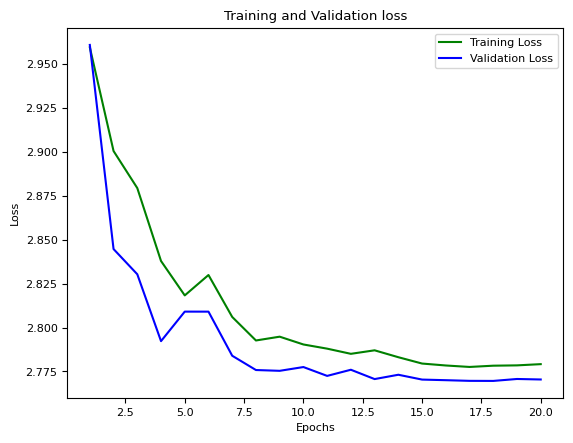

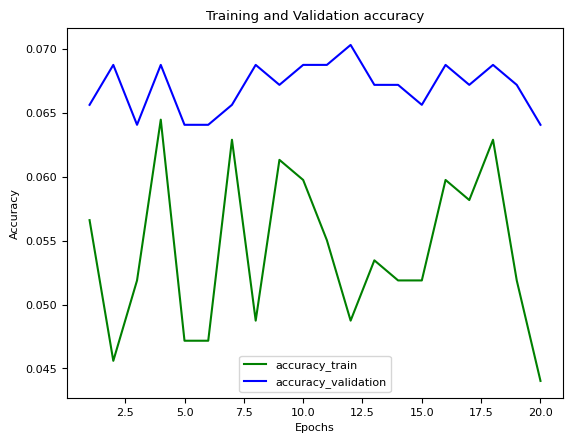

In [ ]:
# Define your model based on ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add your custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # You can adjust the number of units in this layer
predictions = Dense(units=maxnbr_classes+1, activation='softmax')(x)  # Adjust num_classes according to your classification task

# Combine base model with custom layers
model4 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model4.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model4.summary()

# Define parameters for ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom transformation
    horizontal_flip=True  # Horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing data

# Set up the generators
train_generator = train_datagen.flow(
    train_images_arr_norm,
    y_train,
    batch_size=batch_size
)

validation_generator = test_datagen.flow(
    test_images_arr_norm,
    y_test,
    batch_size=batch_size
)

# Train the model
model_4 = model4.fit_generator(
    train_generator,
    steps_per_epoch=len(train_images_arr_norm) // batch_size,
    epochs=number_of_epochs,
    validation_data=validation_generator,
    validation_steps=len(test_images_arr_norm) // batch_size
)

EPOCH=number_of_epochs

loss_train = model_4.history['loss']
loss_val = model_4.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_train = model_4.history['accuracy']
accuracy_val = model_4.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs,accuracy_train,'g',label='accuracy_train')
plt.plot(epochs,accuracy_val,'b',label='accuracy_validation')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

del model4
del model_4


%%shell

nbconvert --to html ///content/CapstoneProject_CV2_GRP2_CAPSTONE_Milestone1.ipynb


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Imports the necessary libraries
import sys
import os
import requests
from tqdm.notebook import tqdm
from pathlib import Path
from PIL import Image
from io import BytesIO
from matplotlib.pylab import rcParams
from IPython.display import display, Image
from PIL import Image as PILImage
import shutil

import tensorflow as tf
import pandas as pd
import cv2
from os import path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [ ]:
img_width = 224
img_height = 224
img_channels = 3
max_classes = 196
batch_size=16
total_classes = 196
max_epochs=2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/CAPSTONE/'
car_image_zipfile = project_path + "Car+Images.zip"
annotations_zipfile = project_path + "Annotations.zip"
annotations_path = project_path+"Annotations/"
car_images_path = project_path+"Car Images/"

yolo9_maindir = project_path + "yolov9/"
yolo9_datasetdir = yolo9_maindir + "data/"

yolo9_train = yolo9_datasetdir + "train/"
yolo9_train_images = yolo9_train + "images/"
yolo9_train_labels = yolo9_train + "labels/"

yolo9_valid = yolo9_datasetdir + "valid/"
yolo9_valid_images = yolo9_valid + "images/"
yolo9_valid_labels = yolo9_valid + "labels/"

yolo9_test = yolo9_datasetdir + "test/"
yolo9_test_images = yolo9_test + "images/"
yolo9_test_labels = yolo9_test + "labels/"

carmake_class_csvfile = project_path + "Car+names+and+make.csv"
test_annotation_csvfile = annotations_path+"Test Annotation.csv"
train_annotation_csvfile = annotations_path+"Train Annotations.csv"

saved_test_annotation_csvfile= annotations_path+"Saved_Test_Annotation.csv"
saved_train_annotation_csvfile = annotations_path+"Saved_Train_Annotations.csv"

test_images_folder = car_images_path + "Test Images/"
train_images_folder = car_images_path + "Train Images/"

checkpoint_filepath = project_path + "checkpoint_tfdatasets_cnn_car_detection_weights.h5"

Mounted at /content/drive


In [ ]:
# img_width = 128
# img_height = 128
img_width = 224
img_height = 224
img_channels = 3
max_classes = 196
batch_size=16
total_classes = 196
#max_epochs=20
max_epochs=2

In [ ]:
print(project_path)
cwd= os.getcwd()
print (cwd)
os.chdir(project_path)
cwd= os.getcwd()
print (cwd)
HOME = cwd

/content/drive/MyDrive/CAPSTONE/
/content/drive/My Drive/CAPSTONE/yolov9
/content/drive/MyDrive/CAPSTONE


In [ ]:
# !git clone https://github.com/carlosfab/yolov9.git

# Change the current working directory to the cloned YOLOv9 repository
%cd yolov9

# Install the necessary YOLOv9 dependencies from the requirements.txt file
# !pip install -r requirements.txt -q

/content/drive/MyDrive/CAPSTONE/yolov9


In [ ]:
# os.makedirs(yolo9_maindir, exist_ok=True)
# os.makedirs(yolo9_datasetdir, exist_ok=True)

# os.makedirs(yolo9_train, exist_ok=True)
# os.makedirs(yolo9_train_images, exist_ok=True)
# os.makedirs(yolo9_train_labels, exist_ok=True)

# os.makedirs(yolo9_valid, exist_ok=True)
# os.makedirs(yolo9_valid_images, exist_ok=True)
# os.makedirs(yolo9_valid_labels, exist_ok=True)

# os.makedirs(yolo9_test, exist_ok=True)
# os.makedirs(yolo9_test_images, exist_ok=True)
# os.makedirs(yolo9_test_labels, exist_ok=True)


In [ ]:
columns = ['namemake']
carmake_classes = pd.read_csv(carmake_class_csvfile, header=None)
carmake_classes.index +=1
carmake_classes.columns = columns

In [ ]:
carmake_classes

namemake
1          AM General Hummer SUV 2000
2                 Acura RL Sedan 2012
3                 Acura TL Sedan 2012
4                Acura TL Type-S 2008
5                Acura TSX Sedan 2012
..                                ...
192  Volkswagen Beetle Hatchback 2012
193          Volvo C30 Hatchback 2012
194              Volvo 240 Sedan 1993
195               Volvo XC90 SUV 2007
196     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [ ]:
train_annotations = pd.read_csv(saved_train_annotation_csvfile)
train_annotations = train_annotations.drop(['Unnamed: 0'], axis=1)
train_annotations.head()

image_path   x1   y1    x2    y2  \
0  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   39  116   569   375   
1  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   36  116   868   587   
2  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   85  109   601   381   
3  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...  621  393  1484  1096   
4  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   14   36   133    99   

   class_idx  nx1  ny1  nx2  ny2  height  width  channels  aspect_ratio  \
0         14    8   37  121  120     400    600         3      1.500000   
1          3    5   21  123  111     675    900         3      1.333333   
2         91   17   29  120  101     480    640         3      1.333333   
3        134   37   36   90  101    1386   2100         3      1.515152   
4        106   12   42  118  117     108    144         3      1.333333   

   nbr_pixels  
0      720000  
1     1822500  
2      921600  
3     8731800  
4       46656

In [ ]:
train_annotations['class_idx'] = train_annotations['class_idx'] - 1
train_annotations.head()

image_path   x1   y1    x2    y2  \
0  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   39  116   569   375   
1  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   36  116   868   587   
2  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   85  109   601   381   
3  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...  621  393  1484  1096   
4  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   14   36   133    99   

   class_idx  nx1  ny1  nx2  ny2  height  width  channels  aspect_ratio  \
0         13    8   37  121  120     400    600         3      1.500000   
1          2    5   21  123  111     675    900         3      1.333333   
2         90   17   29  120  101     480    640         3      1.333333   
3        133   37   36   90  101    1386   2100         3      1.515152   
4        105   12   42  118  117     108    144         3      1.333333   

   nbr_pixels  
0      720000  
1     1822500  
2      921600  
3     8731800  
4       46656

In [ ]:
test_annotations = pd.read_csv(saved_test_annotation_csvfile)
test_annotations = test_annotations.drop(['Unnamed: 0'], axis=1)
test_annotations.head()

image_path   x1   y1   x2   y2  \
0  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...   30   52  246  147   
1  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  100   19  576  203   
2  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...   51  105  968  659   
3  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...   67   84  581  407   
4  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  140  151  593  339   

   class_idx  nx1  ny1  nx2  ny2  height  width  channels  aspect_ratio  \
0        181   13   36  114  103     182    276         3      1.516484   
1        103   20    6  115   72     360    640         3      1.777778   
2        145    6   18  121  113     741   1024         3      1.381916   
3        187   13   22  116  108     480    640         3      1.333333   
4        185   29   51  126  116     373    600         3      1.608579   

   nbr_pixels  
0      150696  
1      691200  
2     2276352  
3      921600  
4      671400

In [ ]:
test_annotations['class_idx'] = test_annotations['class_idx'] - 1
test_annotations.head()

image_path   x1   y1   x2   y2  \
0  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...   30   52  246  147   
1  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  100   19  576  203   
2  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...   51  105  968  659   
3  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...   67   84  581  407   
4  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  140  151  593  339   

   class_idx  nx1  ny1  nx2  ny2  height  width  channels  aspect_ratio  \
0        180   13   36  114  103     182    276         3      1.516484   
1        102   20    6  115   72     360    640         3      1.777778   
2        144    6   18  121  113     741   1024         3      1.381916   
3        186   13   22  116  108     480    640         3      1.333333   
4        184   29   51  126  116     373    600         3      1.608579   

   nbr_pixels  
0      150696  
1      691200  
2     2276352  
3      921600  
4      671400

In [ ]:
train_annotations.class_idx.nunique()

196

<Axes: >

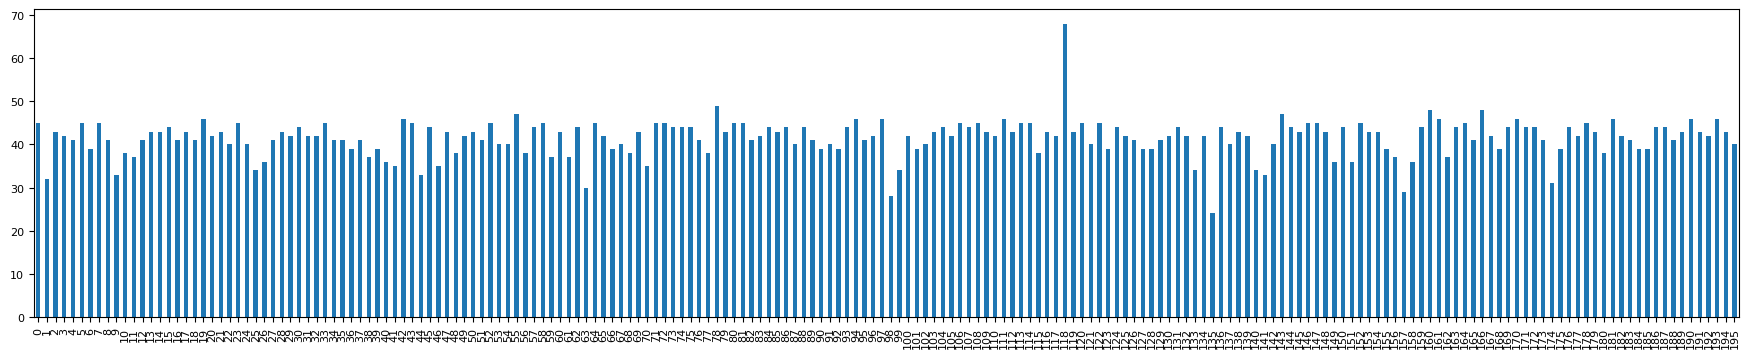

In [ ]:
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
train_annotations.class_idx.value_counts().sort_index().plot(kind='bar')

In [ ]:
test_annotations.class_idx.nunique()

196

<Axes: >

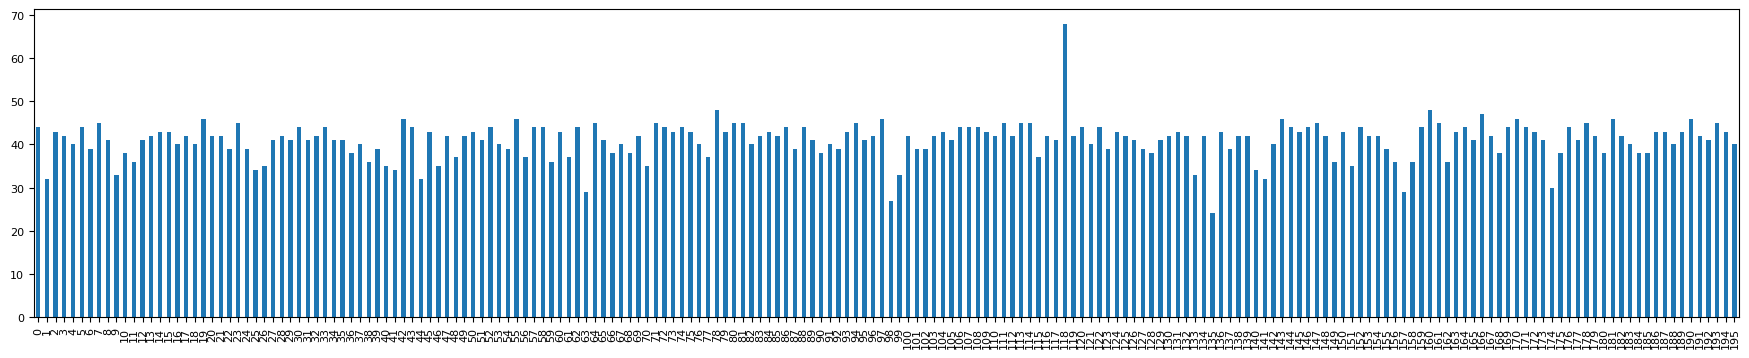

In [ ]:
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
test_annotations.class_idx.value_counts().sort_index().plot(kind='bar')

In [ ]:
test_annotations.shape

(8041, 15)

In [ ]:
train_annotations.shape

(8144, 15)

In [ ]:
row_1 = train_annotations.iloc[5].to_numpy().tolist()
row_1

['/content/drive/MyDrive/CAPSTONE/Car Images/Train Images/Geo Metro Convertible 1993/00006.jpg',
 259,
 289,
 515,
 416,
 122,
 57,
 85,
 114,
 123,
 431,
 575,
 3,
 1.334106728538283,
 743475]

In [ ]:
projImgCSVpath=""
def load_image_for_vis(image_path):
  image = tf.io.read_file(image_path)
  image = tf.io.decode_image(image,channels=3)
  image = image.numpy().astype(np.uint8)
  return image

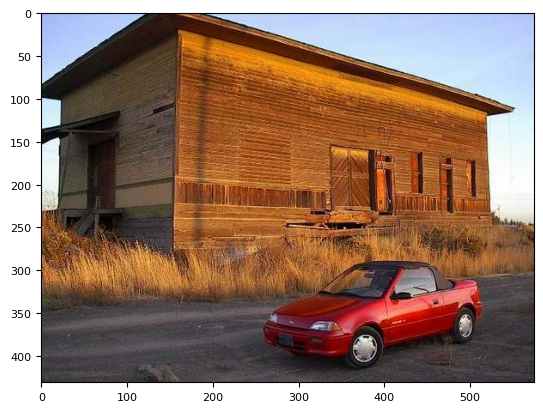

In [ ]:
plt.imshow(load_image_for_vis(row_1[0]))

259 289 515 416


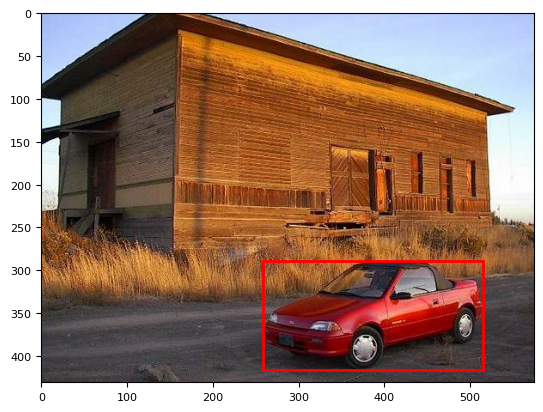

In [ ]:
im = load_image_for_vis(row_1[0])
fig,ax = plt.subplots()
ax.imshow(im)

x1,y1,x2,y2 = row_1[1:5]
print(x1,y1,x2,y2)
width = x2 - x1
height = y2 - y1

rect = patches.Rectangle((x1,y1),width,height,linewidth=2, edgecolor = 'r',facecolor='none')
ax.add_patch(rect)

In [ ]:
import cv2
def calculate_resizedbb(df):
  for idx in df.index:
    image = cv2.imread(df['image_path'][idx])
    ah,aw,ac = image.shape
    #print("xxx:",df['x1'][idx],df['y1'][idx],df['x2'][idx],df['y2'][idx])
    nx1 = int(float(df.loc[idx,'x1']/aw)*img_width)
    ny1 = int(float(df.loc[idx,'y1']/ah)*img_height)
    nx2 = int(float(df.loc[idx,'x2']/aw)*img_width)
    ny2 = int(float(df.loc[idx,'y2']/ah)*img_height)
    #print("xxx",nx1,ny1,nx2,ny2)
    df.loc[idx,'nx1']=nx1
    df.loc[idx,'ny1']=ny1
    df.loc[idx,'nx2']=nx2
    df.loc[idx,'ny2']=ny2
    df.loc[idx,'orig_height']=ah
    df.loc[idx,'orig_width']=aw
    df.loc[idx,'orig_channels']=ac
    df.loc[idx,'orig_aspect_ratio']=float(aw/ah)
    df.loc[idx,'orig_nbr_pixels']=ah*aw*ac
  return df

In [ ]:
train_annotations.describe().T

count          mean           std           min            25%  \
x1            8144.0  6.490680e+01  8.219868e+01      1.000000      19.000000   
y1            8144.0  1.086612e+02  1.045516e+02      1.000000      42.000000   
x2            8144.0  6.382086e+02  4.107767e+02     76.000000     392.000000   
y2            8144.0  4.164316e+02  2.737860e+02     47.000000     248.000000   
class_idx     8144.0  9.797937e+01  5.650315e+01      0.000000      49.000000   
nx1           8144.0  1.084921e+01  9.591643e+00      0.000000       4.000000   
ny1           8144.0  2.744536e+01  1.548552e+01      0.000000      16.000000   
nx2           8144.0  1.169730e+02  9.423907e+00     47.000000     113.000000   
ny2           8144.0  1.105199e+02  1.030507e+01     57.000000     104.000000   
height        8144.0  4.827720e+02  3.175800e+02     57.000000     290.000000   
width         8144.0  6.997931e+02  4.509224e+02     78.000000     429.000000   
channels      8144.0  3.000000e+00  0.000000e+00      3.000000       3.000000   
aspect_ratio  8144.0  1.473561e+00  2.329875e-01      0.593066       1.333333   
nbr_pixels    8144.0  1.431081e+06  2.670392e+06  13572.000000  363720.000000   

                        50%           75%           max  
x1                39.000000  7.900000e+01  1.648000e+03  
y1                80.000000  1.382500e+02  1.508000e+03  
x2               569.000000  7.462500e+02  5.205000e+03  
y2               360.000000  4.770000e+02  3.389000e+03  
class_idx         98.000000  1.470000e+02  1.950000e+02  
nx1                8.000000  1.500000e+01  8.200000e+01  
ny1               26.000000  3.800000e+01  8.600000e+01  
nx2              120.000000  1.230000e+02  1.590000e+02  
ny2              112.000000  1.180000e+02  1.280000e+02  
height           424.000000  5.400000e+02  3.744000e+03  
width            636.500000  8.000000e+02  5.616000e+03  
channels           3.000000  3.000000e+00  3.000000e+00  
aspect_ratio       1.348485  1.519757e+00  3.887538e+00  
nbr_pixels    797256.000000  1.297091e+06  6.307891e+07

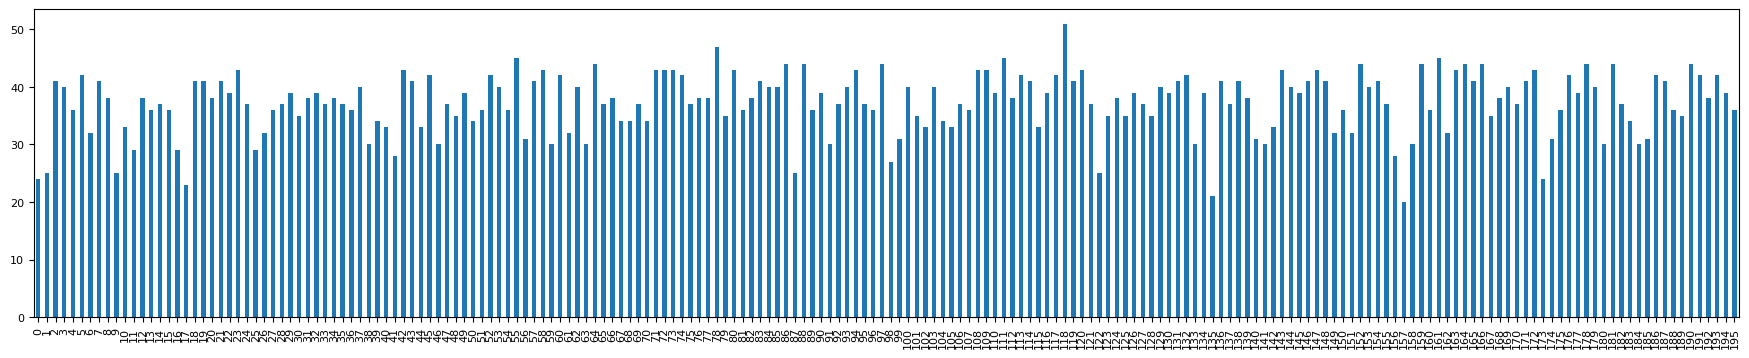

In [ ]:
train_pxlfilter = train_annotations[train_annotations['nbr_pixels']>img_width*img_height*img_channels]
train_aspect_rationlessthan1p8df = train_pxlfilter[train_pxlfilter['aspect_ratio']<=1.8]
train_aspect_ration_lt1p8gtp8df = train_aspect_rationlessthan1p8df[train_aspect_rationlessthan1p8df['aspect_ratio']>=0.8]
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
train_aspect_ration_lt1p8gtp8df.class_idx.value_counts().sort_index().plot(kind='bar')
train_min = train_aspect_ration_lt1p8gtp8df.class_idx.value_counts().min()
train_max = train_aspect_ration_lt1p8gtp8df.class_idx.value_counts().max()

In [ ]:
print("train_aspect_ration_lt1p8gtp8df.shape.shape",train_aspect_ration_lt1p8gtp8df.shape)
print("train_aspect_ration_lt1p8gtp8df min of class:",train_min)
print("train_aspect_ration_lt1p8gtp8df max of class:",train_max)
print("total images to consider:",total_classes*train_min)

train_aspect_ration_lt1p8gtp8df.shape.shape (7299, 15)
train_aspect_ration_lt1p8gtp8df min of class: 20
train_aspect_ration_lt1p8gtp8df max of class: 51
total images to consider: 3920


In [ ]:
train_input_df = pd.DataFrame(columns = train_aspect_ration_lt1p8gtp8df.columns.tolist())

In [ ]:
for idx in carmake_classes.index:
  train_input_df = pd.concat([train_input_df,train_aspect_ration_lt1p8gtp8df[train_aspect_ration_lt1p8gtp8df['class_idx']==idx][:train_min]])
train_input_df = train_input_df.sample(frac = 1)
train_input_df = train_input_df.reset_index(drop=True)

In [ ]:
train_input_df.shape

(3900, 15)

In [ ]:
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_path    3900 non-null   object 
 1   x1            3900 non-null   object 
 2   y1            3900 non-null   object 
 3   x2            3900 non-null   object 
 4   y2            3900 non-null   object 
 5   class_idx     3900 non-null   object 
 6   nx1           3900 non-null   object 
 7   ny1           3900 non-null   object 
 8   nx2           3900 non-null   object 
 9   ny2           3900 non-null   object 
 10  height        3900 non-null   object 
 11  width         3900 non-null   object 
 12  channels      3900 non-null   object 
 13  aspect_ratio  3900 non-null   float64
 14  nbr_pixels    3900 non-null   object 
dtypes: float64(1), object(14)
memory usage: 457.2+ KB


In [ ]:
train_input_df['image_path'] = train_input_df['image_path'].astype(str)
train_input_df['x1'] = train_input_df['x1'].astype(int)
train_input_df['y1'] = train_input_df['y1'].astype(int)
train_input_df['x2'] = train_input_df['x2'].astype(int)
train_input_df['y2'] = train_input_df['y2'].astype(int)
train_input_df['class_idx'] = train_input_df['class_idx'].astype(int)
train_input_df['nx1'] = train_input_df['nx1'].astype(int)
train_input_df['ny1'] = train_input_df['ny1'].astype(int)
train_input_df['nx2'] = train_input_df['nx2'].astype(int)
train_input_df['ny2'] = train_input_df['ny2'].astype(int)
train_input_df['height'] = train_input_df['height'].astype(int)
train_input_df['width'] = train_input_df['width'].astype(int)
train_input_df['channels'] = train_input_df['channels'].astype(int)
train_input_df['nbr_pixels'] = train_input_df['nbr_pixels'].astype(int)

print(train_input_df.dtypes)

image_path       object
x1                int64
y1                int64
x2                int64
y2                int64
class_idx         int64
nx1               int64
ny1               int64
nx2               int64
ny2               int64
height            int64
width             int64
channels          int64
aspect_ratio    float64
nbr_pixels        int64
dtype: object


<Axes: >

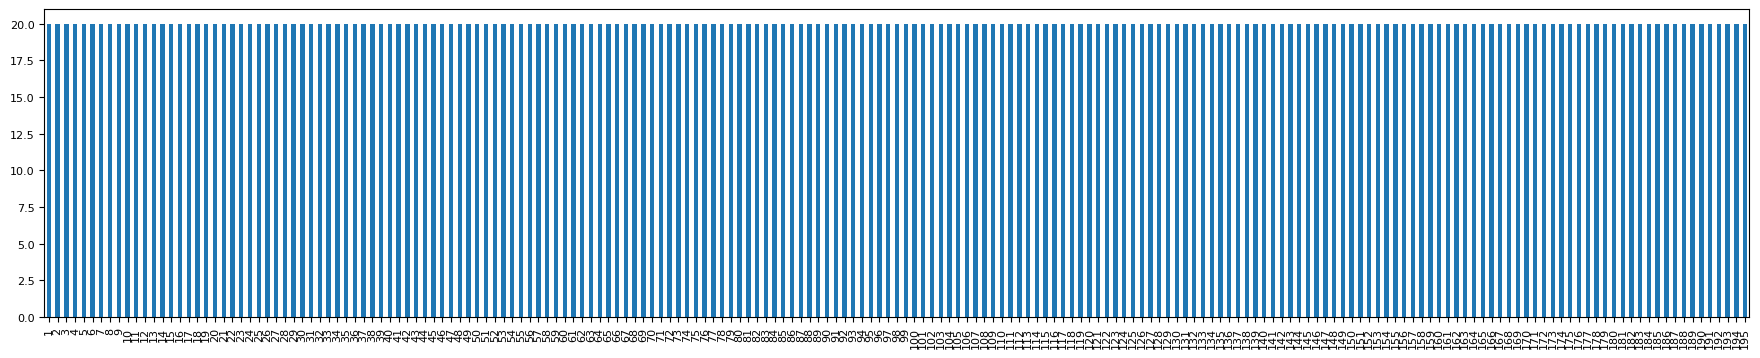

In [ ]:
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
train_input_df.class_idx.value_counts().sort_index().plot(kind='bar')

In [ ]:
train_input_df.head()

image_path   x1   y1   x2   y2  \
0  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   50   93  696  403   
1  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   38  154  474  301   
2  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...  373  350  780  631   
3  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   33   12  226  191   
4  /content/drive/MyDrive/CAPSTONE/Car Images/Tra...   26  133  618  347   

   class_idx  nx1  ny1  nx2  ny2  height  width  channels  aspect_ratio  \
0         48    8   25  118  109     469    750         3      1.599147   
1        160    9   52  121  102     375    500         3      1.333333   
2         44   43   54   90   97     826   1100         3      1.331719   
3        124   16    7  111  126     194    259         3      1.335052   
4         35    5   35  123   92     480    640         3      1.333333   

   nbr_pixels  
0     1055250  
1      562500  
2     2725800  
3      150738  
4      921600

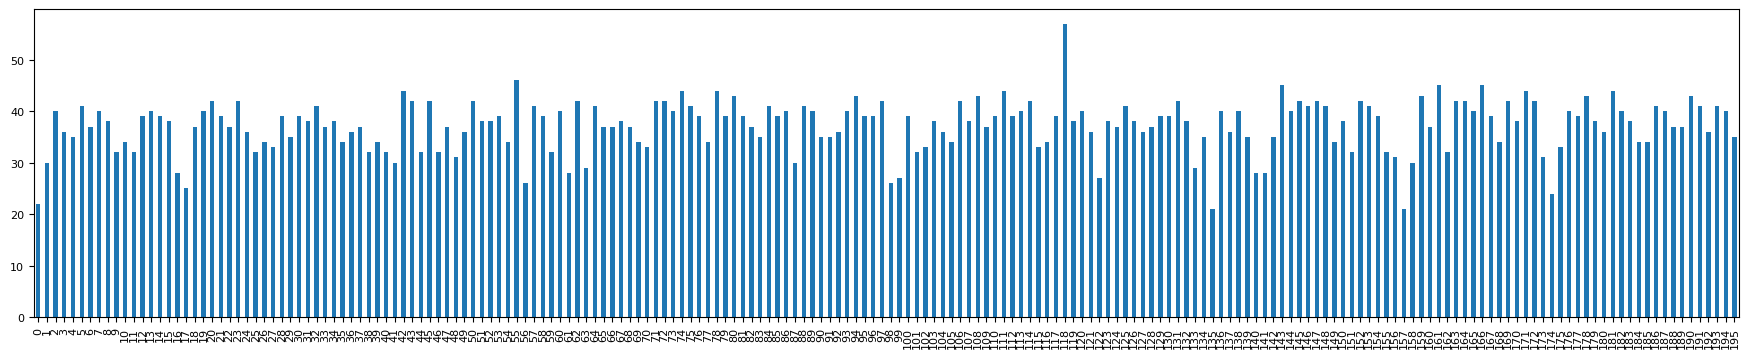

In [ ]:
test_pxlfilter = test_annotations[test_annotations['nbr_pixels']>img_width*img_height*img_channels]
test_aspect_rationlessthan1p8df = test_pxlfilter[test_pxlfilter['aspect_ratio']<=1.8]
test_aspect_ration_lt1p8gtp8df = test_aspect_rationlessthan1p8df[test_aspect_rationlessthan1p8df['aspect_ratio']>=0.8]
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
test_aspect_ration_lt1p8gtp8df.class_idx.value_counts().sort_index().plot(kind='bar')
test_min = test_aspect_ration_lt1p8gtp8df.class_idx.value_counts().min()
test_max = test_aspect_ration_lt1p8gtp8df.class_idx.value_counts().max()

In [ ]:
print("test_aspect_ration_lt1p8gtp8df.shape.shape",test_aspect_ration_lt1p8gtp8df.shape)
print("test_aspect_ration_lt1p8gtp8df min of class:",test_min)
print("test_aspect_ration_lt1p8gtp8df max of class:",test_max)
print("total images to consider:",total_classes*test_min)

test_aspect_ration_lt1p8gtp8df.shape.shape (7292, 15)
test_aspect_ration_lt1p8gtp8df min of class: 21
test_aspect_ration_lt1p8gtp8df max of class: 57
total images to consider: 4116


In [ ]:
test_input_df = pd.DataFrame(columns = test_aspect_ration_lt1p8gtp8df.columns.tolist())

In [ ]:
for idx in carmake_classes.index:
  test_input_df = pd.concat([test_input_df,test_aspect_ration_lt1p8gtp8df[test_aspect_ration_lt1p8gtp8df['class_idx']==idx][:test_min]])
test_input_df = test_input_df.sample(frac = 1)
test_input_df = test_input_df.reset_index(drop=True)

In [ ]:
test_input_df.shape

(4095, 15)

In [ ]:
test_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_path    4095 non-null   object 
 1   x1            4095 non-null   object 
 2   y1            4095 non-null   object 
 3   x2            4095 non-null   object 
 4   y2            4095 non-null   object 
 5   class_idx     4095 non-null   object 
 6   nx1           4095 non-null   object 
 7   ny1           4095 non-null   object 
 8   nx2           4095 non-null   object 
 9   ny2           4095 non-null   object 
 10  height        4095 non-null   object 
 11  width         4095 non-null   object 
 12  channels      4095 non-null   object 
 13  aspect_ratio  4095 non-null   float64
 14  nbr_pixels    4095 non-null   object 
dtypes: float64(1), object(14)
memory usage: 480.0+ KB


In [ ]:
test_input_df['image_path'] = test_input_df['image_path'].astype(str)
test_input_df['x1'] = test_input_df['x1'].astype(int)
test_input_df['y1'] = test_input_df['y1'].astype(int)
test_input_df['x2'] = test_input_df['x2'].astype(int)
test_input_df['y2'] = test_input_df['y2'].astype(int)
test_input_df['class_idx'] = test_input_df['class_idx'].astype(int)
test_input_df['nx1'] = test_input_df['nx1'].astype(int)
test_input_df['ny1'] = test_input_df['ny1'].astype(int)
test_input_df['nx2'] = test_input_df['nx2'].astype(int)
test_input_df['ny2'] = test_input_df['ny2'].astype(int)
test_input_df['height'] = test_input_df['height'].astype(int)
test_input_df['width'] = test_input_df['width'].astype(int)
test_input_df['channels'] = test_input_df['channels'].astype(int)
test_input_df['nbr_pixels'] = test_input_df['nbr_pixels'].astype(int)

print(test_input_df.dtypes)

image_path       object
x1                int64
y1                int64
x2                int64
y2                int64
class_idx         int64
nx1               int64
ny1               int64
nx2               int64
ny2               int64
height            int64
width             int64
channels          int64
aspect_ratio    float64
nbr_pixels        int64
dtype: object


<Axes: >

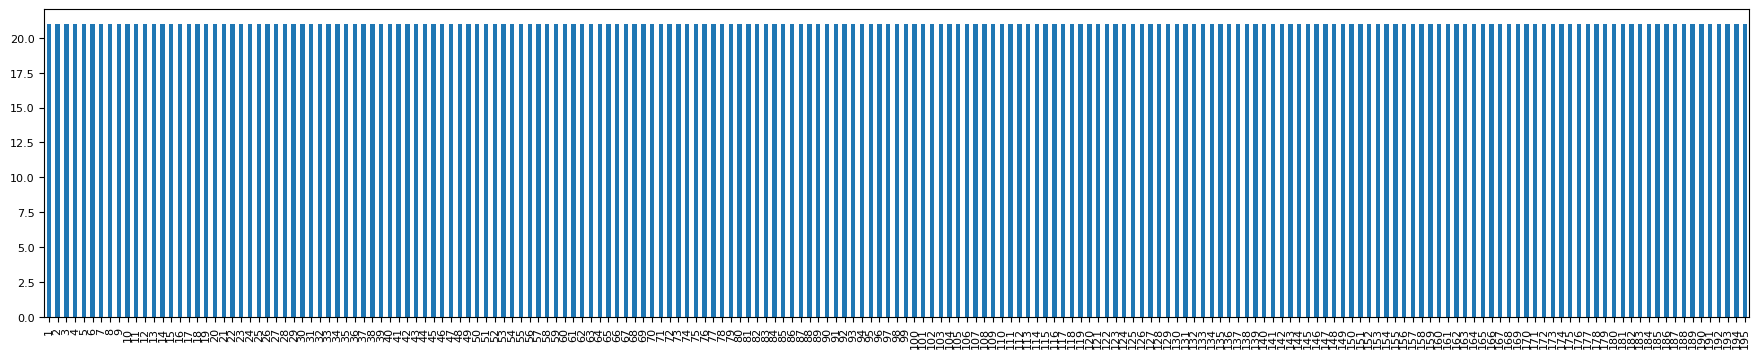

In [ ]:
plt.figure(figsize=(22,4))
plt.rcParams.update({'font.size': 8})
test_input_df.class_idx.value_counts().sort_index().plot(kind='bar')

In [ ]:
test_input_df.head()

image_path  x1   y1   x2   y2  \
0  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  37  124  560  341   
1  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  24    1  559  368   
2  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  74   40  513  285   
3  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  14   38  252  161   
4  /content/drive/MyDrive/CAPSTONE/Car Images/Tes...  75  135  568  346   

   class_idx  nx1  ny1  nx2  ny2  height  width  channels  aspect_ratio  \
0         15    7   33  114   93     469    625         3      1.332623   
1        183    5    0  123  127     370    580         3      1.567568   
2        187   16   15  114  109     332    576         3      1.734940   
3        161    6   24  122  104     198    264         3      1.333333   
4         48   15   44  116  113     389    623         3      1.601542   

   nbr_pixels  
0      879375  
1      643800  
2      573696  
3      156816  
4      727041

In [ ]:
train_df = train_input_df
half_test = int(test_input_df.shape[0]/2)
test_df,valid_df = test_input_df[:half_test],test_input_df[half_test:]
print("Train:",train_df.shape)
print("Test",test_df.shape)
print("Validation",valid_df.shape)

Train: (3900, 15)
Test (2047, 15)
Validation (2048, 15)


In [ ]:
# # Train: Create annotations and move images to the folder as required by yolo9
# source_file_path = train_df['image_path'][0]
# classid = carmake_classes[carmake_classes['namemake']==source_file_path.split('/')[-2]].index[0]
# classidx = train_df.loc[0]['class_idx']
# new_img_name = str(classid) + "_" + train_df['image_path'][0].split('/')[-1]
# destination_img_path = yolo9_train_images+new_img_name
# annotation_filename = new_img_name.split('.')[0]+'.txt'
# annotation_file_path = yolo9_train_labels + annotation_filename

# print('source_file_path',source_file_path)
# print('classid',classid)
# print('classidx',classidx)
# print('new_img_name',new_img_name)
# print('destination_img_path',destination_img_path)
# print('annotation_filename',annotation_filename)
# print('annotation_file_path',annotation_file_path)

In [ ]:
# print(train_df.shape)
# for idx in train_df.index:
#   # print("..............")
#   print(idx)

#   source_file_path = train_df['image_path'][idx]
#   # print('source_file_path',source_file_path)

#   classid = carmake_classes[carmake_classes['namemake']==source_file_path.split('/')[-2]].index[0]
#   # print('classid',classid)

#   new_img_name = str(classid) + "_" + train_df['image_path'][idx].split('/')[-1]
#   # print('new_img_name',new_img_name)

#   destination_img_path = yolo9_train_images+new_img_name
#   # print('destination_img_path',destination_img_path)

#   shutil.copy(source_file_path,destination_img_path )

#   annotation_filename = new_img_name.split('.')[0]+'.txt'
#   # print('annotation_filename',annotation_filename)

#   annotation_file_path = yolo9_train_labels + annotation_filename
#   # print('annotation_file_path',annotation_file_path)

#   classidx = train_df.loc[idx]['class_idx']
#   # print('classidx',classidx)

#   width = train_df.loc[idx]['width']
#   height = train_df.loc[idx]['height']
#   x1 = train_df.loc[idx]['x1']/width
#   x2 = train_df.loc[idx]['x2']/width
#   y1 = train_df.loc[idx]['y1']/height
#   y2 = train_df.loc[idx]['y2']/height

#   width = x2 - x1
#   x_center = x1+width/2
#   height = y2 - y1
#   y_center = y1+height/2

#   with open(annotation_file_path, 'w') as file:
#     # print(classidx,x_center,y_center,width,height)
#     file.write(f"{classidx} {x_center} {y_center} {width} {height} \n")

In [ ]:
valid_df.loc[3920]

image_path      /content/drive/MyDrive/CAPSTONE/Car Images/Tes...
x1                                                             21
y1                                                             34
x2                                                            456
y2                                                            294
class_idx                                                     165
nx1                                                             5
ny1                                                            13
nx2                                                           116
ny2                                                           113
height                                                        333
width                                                         500
channels                                                        3
aspect_ratio                                             1.501502
nbr_pixels                                                 499500
Name: 3920

In [ ]:
# # Valid: Create annotations and move images to the folder as required by yolo9

# source_file_path = valid_df['image_path'][2058]
# classid = carmake_classes[carmake_classes['namemake']==source_file_path.split('/')[-2]].index[0]
# classidx = valid_df.loc[2058]['class_idx']
# new_img_name = str(classid) + "_" + valid_df['image_path'][2058].split('/')[-1]
# destination_img_path = yolo9_valid_images+new_img_name
# annotation_filename = new_img_name.split('.')[0]+'.txt'
# annotation_file_path = yolo9_valid_labels + annotation_filename

# print('source_file_path',source_file_path)
# print('classid',classid)
# print('classidx',classidx)
# print('new_img_name',new_img_name)
# print('destination_img_path',destination_img_path)
# print('annotation_filename',annotation_filename)
# print('annotation_file_path',annotation_file_path)

In [ ]:
# print(valid_df.shape)
# for idx in valid_df.index:
#   # print("..............")
#   print(idx)

#   source_file_path = valid_df['image_path'][idx]
#   # print('source_file_path',source_file_path)

#   classid = carmake_classes[carmake_classes['namemake']==source_file_path.split('/')[-2]].index[0]
#   # print('classid',classid)

#   new_img_name = str(classid) + "_" + valid_df['image_path'][idx].split('/')[-1]
#   # print('new_img_name',new_img_name)

#   destination_img_path = yolo9_valid_images+new_img_name
#   # print('destination_img_path',destination_img_path)

#   shutil.copy(source_file_path,destination_img_path )

#   annotation_filename = new_img_name.split('.')[0]+'.txt'
#   # print('annotation_filename',annotation_filename)

#   annotation_file_path = yolo9_valid_labels + annotation_filename
#   # print('annotation_file_path',annotation_file_path)

#   classidx = valid_df.loc[idx]['class_idx']
#   # print('classidx',classidx)

#   width = valid_df.loc[idx]['width']
#   height = valid_df.loc[idx]['height']
#   x1 = valid_df.loc[idx]['x1']/width
#   x2 = valid_df.loc[idx]['x2']/width
#   y1 = valid_df.loc[idx]['y1']/height
#   y2 = valid_df.loc[idx]['y2']/height

#   width = x2 - x1
#   x_center = x1+width/2
#   height = y2 - y1
#   y_center = y1+height/2

#   with open(annotation_file_path, 'w') as file:
#     # print(classidx,x_center,y_center,width,height)
#     file.write(f"{classidx} {x_center} {y_center} {width} {height} \n")

In [ ]:
# # Test: Create annotations and move images to the folder as required by yolo9
# # yolo9_test = yolo9_datasetdir + "test/"
# # yolo9_test_images = yolo9_test + "images/"
# # yolo9_test_labels = yolo9_test + "labels/"

# source_file_path = test_df['image_path'][0]
# classid = carmake_classes[carmake_classes['namemake']==source_file_path.split('/')[-2]].index[0]
# classidx = test_df.loc[0]['class_idx']
# new_img_name = str(classid) + "_" + test_df['image_path'][0].split('/')[-1]
# destination_img_path = yolo9_test_images+new_img_name
# annotation_filename = new_img_name.split('.')[0]+'.txt'
# annotation_file_path = yolo9_test_labels + annotation_filename

# print('source_file_path',source_file_path)
# print('classid',classid)
# print('classidx',classidx)
# print('new_img_name',new_img_name)
# print('destination_img_path',destination_img_path)
# print('annotation_filename',annotation_filename)
# print('annotation_file_path',annotation_file_path)

In [ ]:
# print(test_df.shape)
# for idx in test_df.index:
#   # print("..............")
#   print(idx)

#   source_file_path = test_df['image_path'][idx]
#   # print('source_file_path',source_file_path)

#   classid = carmake_classes[carmake_classes['namemake']==source_file_path.split('/')[-2]].index[0]
#   # print('classid',classid)

#   new_img_name = str(classid) + "_" + test_df['image_path'][idx].split('/')[-1]
#   # print('new_img_name',new_img_name)

#   destination_img_path = yolo9_test_images+new_img_name
#   # print('destination_img_path',destination_img_path)

#   shutil.copy(source_file_path,destination_img_path )

#   annotation_filename = new_img_name.split('.')[0]+'.txt'
#   # print('annotation_filename',annotation_filename)

#   annotation_file_path = yolo9_test_labels + annotation_filename
#   # print('annotation_file_path',annotation_file_path)

#   classidx = test_df.loc[idx]['class_idx']
#   # print('classidx',classidx)

#   width = test_df.loc[idx]['width']
#   height = test_df.loc[idx]['height']
#   x1 = test_df.loc[idx]['x1']/width
#   x2 = test_df.loc[idx]['x2']/width
#   y1 = test_df.loc[idx]['y1']/height
#   y2 = test_df.loc[idx]['y2']/height

#   width = x2 - x1
#   x_center = x1+width/2
#   height = y2 - y1
#   y_center = y1+height/2

#   with open(annotation_file_path, 'w') as file:
#     # print(classidx,x_center,y_center,width,height)
#     file.write(f"{classidx} {x_center} {y_center} {width} {height} \n")

In [ ]:
cwd= os.getcwd()
print (cwd)
print(HOME)

/content/drive/MyDrive/CAPSTONE/yolov9
/content/drive/MyDrive/CAPSTONE


In [ ]:
!mkdir -p {HOME}/yolov9/weights

In [ ]:
!wget -P {HOME}/yolov9/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/yolov9/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/yolov9/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/yolov9/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
%cd yolov9
cwd= os.getcwd()
print (cwd)

[Errno 2] No such file or directory: 'yolov9'
/content/drive/MyDrive/CAPSTONE/yolov9
/content/drive/MyDrive/CAPSTONE/yolov9


In [ ]:
num_class = 196
classes = [
'AM General Hummer SUV 2000',
'Acura RL Sedan 2012',
'Acura TL Sedan 2012',
'Acura TL Type-S 2008',
'Acura TSX Sedan 2012',
'Acura Integra Type R 2001',
'Acura ZDX Hatchback 2012',
'Aston Martin V8 Vantage Convertible 2012',
'Aston Martin V8 Vantage Coupe 2012',
'Aston Martin Virage Convertible 2012',
'Aston Martin Virage Coupe 2012',
'Audi RS 4 Convertible 2008',
'Audi A5 Coupe 2012',
'Audi TTS Coupe 2012',
'Audi R8 Coupe 2012',
'Audi V8 Sedan 1994',
'Audi 100 Sedan 1994',
'Audi 100 Wagon 1994',
'Audi TT Hatchback 2011',
'Audi S6 Sedan 2011',
'Audi S5 Convertible 2012',
'Audi S5 Coupe 2012',
'Audi S4 Sedan 2012',
'Audi S4 Sedan 2007',
'Audi TT RS Coupe 2012',
'BMW ActiveHybrid 5 Sedan 2012',
'BMW 1 Series Convertible 2012',
'BMW 1 Series Coupe 2012',
'BMW 3 Series Sedan 2012',
'BMW 3 Series Wagon 2012',
'BMW 6 Series Convertible 2007',
'BMW X5 SUV 2007',
'BMW X6 SUV 2012',
'BMW M3 Coupe 2012',
'BMW M5 Sedan 2010',
'BMW M6 Convertible 2010',
'BMW X3 SUV 2012',
'BMW Z4 Convertible 2012',
'Bentley Continental Supersports Conv. Convertible 2012',
'Bentley Arnage Sedan 2009',
'Bentley Mulsanne Sedan 2011',
'Bentley Continental GT Coupe 2012',
'Bentley Continental GT Coupe 2007',
'Bentley Continental Flying Spur Sedan 2007',
'Bugatti Veyron 16.4 Convertible 2009',
'Bugatti Veyron 16.4 Coupe 2009',
'Buick Regal GS 2012',
'Buick Rainier SUV 2007',
'Buick Verano Sedan 2012',
'Buick Enclave SUV 2012',
'Cadillac CTS-V Sedan 2012',
'Cadillac SRX SUV 2012',
'Cadillac Escalade EXT Crew Cab 2007',
'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
'Chevrolet Corvette Convertible 2012',
'Chevrolet Corvette ZR1 2012',
'Chevrolet Corvette Ron Fellows Edition Z06 2007',
'Chevrolet Traverse SUV 2012',
'Chevrolet Camaro Convertible 2012',
'Chevrolet HHR SS 2010',
'Chevrolet Impala Sedan 2007',
'Chevrolet Tahoe Hybrid SUV 2012',
'Chevrolet Sonic Sedan 2012',
'Chevrolet Express Cargo Van 2007',
'Chevrolet Avalanche Crew Cab 2012',
'Chevrolet Cobalt SS 2010',
'Chevrolet Malibu Hybrid Sedan 2010',
'Chevrolet TrailBlazer SS 2009',
'Chevrolet Silverado 2500HD Regular Cab 2012',
'Chevrolet Silverado 1500 Classic Extended Cab 2007',
'Chevrolet Express Van 2007',
'Chevrolet Monte Carlo Coupe 2007',
'Chevrolet Malibu Sedan 2007',
'Chevrolet Silverado 1500 Extended Cab 2012',
'Chevrolet Silverado 1500 Regular Cab 2012',
'Chrysler Aspen SUV 2009',
'Chrysler Sebring Convertible 2010',
'Chrysler Town and Country Minivan 2012',
'Chrysler 300 SRT-8 2010',
'Chrysler Crossfire Convertible 2008',
'Chrysler PT Cruiser Convertible 2008',
'Daewoo Nubira Wagon 2002',
'Dodge Caliber Wagon 2012',
'Dodge Caliber Wagon 2007',
'Dodge Caravan Minivan 1997',
'Dodge Ram Pickup 3500 Crew Cab 2010',
'Dodge Ram Pickup 3500 Quad Cab 2009',
'Dodge Sprinter Cargo Van 2009',
'Dodge Journey SUV 2012',
'Dodge Dakota Crew Cab 2010',
'Dodge Dakota Club Cab 2007',
'Dodge Magnum Wagon 2008',
'Dodge Challenger SRT8 2011',
'Dodge Durango SUV 2012',
'Dodge Durango SUV 2007',
'Dodge Charger Sedan 2012',
'Dodge Charger SRT-8 2009',
'Eagle Talon Hatchback 1998',
'FIAT 500 Abarth 2012',
'FIAT 500 Convertible 2012',
'Ferrari FF Coupe 2012',
'Ferrari California Convertible 2012',
'Ferrari 458 Italia Convertible 2012',
'Ferrari 458 Italia Coupe 2012',
'Fisker Karma Sedan 2012',
'Ford F-450 Super Duty Crew Cab 2012',
'Ford Mustang Convertible 2007',
'Ford Freestar Minivan 2007',
'Ford Expedition EL SUV 2009',
'Ford Edge SUV 2012',
'Ford Ranger SuperCab 2011',
'Ford GT Coupe 2006',
'Ford F-150 Regular Cab 2012',
'Ford F-150 Regular Cab 2007',
'Ford Focus Sedan 2007',
'Ford E-Series Wagon Van 2012',
'Ford Fiesta Sedan 2012',
'GMC Terrain SUV 2012',
'GMC Savana Van 2012',
'GMC Yukon Hybrid SUV 2012',
'GMC Acadia SUV 2012',
'GMC Canyon Extended Cab 2012',
'Geo Metro Convertible 1993',
'HUMMER H3T Crew Cab 2010',
'HUMMER H2 SUT Crew Cab 2009',
'Honda Odyssey Minivan 2012',
'Honda Odyssey Minivan 2007',
'Honda Accord Coupe 2012',
'Honda Accord Sedan 2012',
'Hyundai Veloster Hatchback 2012',
'Hyundai Santa Fe SUV 2012',
'Hyundai Tucson SUV 2012',
'Hyundai Veracruz SUV 2012',
'Hyundai Sonata Hybrid Sedan 2012',
'Hyundai Elantra Sedan 2007',
'Hyundai Accent Sedan 2012',
'Hyundai Genesis Sedan 2012',
'Hyundai Sonata Sedan 2012',
'Hyundai Elantra Touring Hatchback 2012',
'Hyundai Azera Sedan 2012',
'Infiniti G Coupe IPL 2012',
'Infiniti QX56 SUV 2011',
'Isuzu Ascender SUV 2008',
'Jaguar XK XKR 2012',
'Jeep Patriot SUV 2012',
'Jeep Wrangler SUV 2012',
'Jeep Liberty SUV 2012',
'Jeep Grand Cherokee SUV 2012',
'Jeep Compass SUV 2012',
'Lamborghini Reventon Coupe 2008',
'Lamborghini Aventador Coupe 2012',
'Lamborghini Gallardo LP 570-4 Superleggera 2012',
'Lamborghini Diablo Coupe 2001',
'Land Rover Range Rover SUV 2012',
'Land Rover LR2 SUV 2012',
'Lincoln Town Car Sedan 2011',
'MINI Cooper Roadster Convertible 2012',
'Maybach Landaulet Convertible 2012',
'Mazda Tribute SUV 2011',
'McLaren MP4-12C Coupe 2012',
'Mercedes-Benz 300-Class Convertible 1993',
'Mercedes-Benz C-Class Sedan 2012',
'Mercedes-Benz SL-Class Coupe 2009',
'Mercedes-Benz E-Class Sedan 2012',
'Mercedes-Benz S-Class Sedan 2012',
'Mercedes-Benz Sprinter Van 2012',
'Mitsubishi Lancer Sedan 2012',
'Nissan Leaf Hatchback 2012',
'Nissan NV Passenger Van 2012',
'Nissan Juke Hatchback 2012',
'Nissan 240SX Coupe 1998',
'Plymouth Neon Coupe 1999',
'Porsche Panamera Sedan 2012',
'Ram C-V Cargo Van Minivan 2012',
'Rolls-Royce Phantom Drophead Coupe Convertible 2012',
'Rolls-Royce Ghost Sedan 2012',
'Rolls-Royce Phantom Sedan 2012',
'Scion xD Hatchback 2012',
'Spyker C8 Convertible 2009',
'Spyker C8 Coupe 2009',
'Suzuki Aerio Sedan 2007',
'Suzuki Kizashi Sedan 2012',
'Suzuki SX4 Hatchback 2012',
'Suzuki SX4 Sedan 2012',
'Tesla Model S Sedan 2012',
'Toyota Sequoia SUV 2012',
'Toyota Camry Sedan 2012',
'Toyota Corolla Sedan 2012',
'Toyota 4Runner SUV 2012',
'Volkswagen Golf Hatchback 2012',
'Volkswagen Golf Hatchback 1991',
'Volkswagen Beetle Hatchback 2012',
'Volvo C30 Hatchback 2012',
'Volvo 240 Sedan 1993',
'Volvo XC90 SUV 2007',
'smart fortwo Convertible 2012']


In [ ]:
len(classes)

196

In [ ]:
import yaml
import os
file_dict = {
    'train':'/content/drive/MyDrive/CAPSTONE/yolov9/data/train',
    'test':'/content/drive/MyDrive/CAPSTONE/yolov9/data/test',
    'val':'/content/drive/MyDrive/CAPSTONE/yolov9/data/valid',
    'nc':num_class,
    'names':classes
}

with open(yolo9_maindir+'data.yaml', 'w') as f:
  yaml.dump(file_dict,f)

In [ ]:
!python train_dual.py --batch 32 --epochs 50\
--data /content/drive/MyDrive/CAPSTONE/yolov9/data.yaml \
--weights {HOME}/yolov9/weights/yolov9-c.pt --cfg models/detect/yolov9-c.yaml \
--hyp /content/drive/MyDrive/CAPSTONE/yolov9/data/hyps/hyp.scratch-high.yaml \
--img-size 224 --device 0

2024-03-17 05:25:35.724782: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 05:25:35.724827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 05:25:35.726129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 05:25:37.006116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/drive/MyDrive/CAPSTONE/yolov9/weights/yolov9-c.pt, cfg=models/detect/yolov9-c.yaml, data=/content/drive/MyDrive/CAPSTONE/yolov9/data.yaml, hyp=/content/drive/MyDrive/CAPSTONE/yolov9/data/hyps/hyp.scratch-high.yam

In [ ]:
!python detect.py \
--conf 0.1 --device 0 --img-size 224 \
--weights /content/drive/MyDrive/CAPSTONE/yolov9/runs/train/exp11/weights/best.pt \
--source /content/drive/MyDrive/CAPSTONE/yolov9/data/test/images


detect: weights=['/content/drive/MyDrive/CAPSTONE/yolov9/runs/train/exp11/weights/best.pt'], source=/content/drive/MyDrive/CAPSTONE/yolov9/data/test/images, data=data/coco128.yaml, imgsz=[224, 224], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 6b38221 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 51148728 parameters, 0 gradients
image 1/2047 /content/drive/MyDrive/CAPSTONE/yolov9/data/test/images/100_00613.jpg: 192x224 1 FIAT 500 Convertible 2012, 96.0ms
image 2/2047 /content/drive/MyDrive/CAPSTONE/yolov9/data/test/images/100_01119.jpg: 224x224 1 FIAT 500 Convertible 2012, 22.2ms
image 3/2047 /content/

In [ ]:
# !pip install tensorflow==2.15.1

In [ ]:
# !pip install keras==2.15

In [ ]:
import os
os.getcwd()
os.chdir('/content/')

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [ ]:
!pip install protobuf

In [ ]:
# clone the Tensorflow Model Garden
#!git clone --depth 1 https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 4084, done.
remote: Counting objects: 100% (4084/4084), done.
remote: Compressing objects: 100% (3076/3076), done.
remote: Total 4084 (delta 1185), reused 1985 (delta 948), pack-reused 0
Receiving objects: 100% (4084/4084), 44.62 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (1185/1185), done.


In [ ]:
!pip uninstall Cython


Found existing installation: Cython 3.0.9
Uninstalling Cython-3.0.9:
  Would remove:
    /usr/local/bin/cygdb
    /usr/local/bin/cython
    /usr/local/bin/cythonize
    /usr/local/lib/python3.10/dist-packages/Cython-3.0.9.dist-info/*
    /usr/local/lib/python3.10/dist-packages/Cython/*
    /usr/local/lib/python3.10/dist-packages/cython.py
    /usr/local/lib/python3.10/dist-packages/pyximport/*
Proceed (Y/n)? y
  Successfully uninstalled Cython-3.0.9


In [ ]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [ ]:
!pip install tensorflow==2.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or pl

In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
from os import path
import cv2
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
import pandas as pd
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.utils.colab_utils import annotate
from object_detection.builders import model_builder
from object_detection.builders.model_builder import build
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
img_width = 320
img_height = 320
img_channels = 3
batch_size=16
total_classes = 196
max_epochs=50
min_aspect_ratio = 0.8
max_aspect_ratio = 1.35

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
model_name = "modelname"
project_path = '/content/drive/MyDrive/GL/'
car_image_zipfile = project_path + "Car+Images.zip"
annotations_zipfile = project_path + "Annotations.zip"
annotations_path = project_path
car_images_path = project_path+"imgs/Car_Images/"

carmake_class_csvfile = project_path + "Car+names+and+make.csv"
test_annotation_csvfile = annotations_path+"Test Annotation.csv"
train_annotation_csvfile = annotations_path+"Train Annotations.csv"

saved_test_annotation_csvfile= annotations_path+"EDA2_Saved_Test_Annotation224h224w.csv"
saved_train_annotation_csvfile = annotations_path+"EDA2_Saved_Train_Annotations224h224w.csv"
csvfileext = ".csv"

test_images_folder = car_images_path + "Test_Images/"
train_images_folder = car_images_path + "Train_Images/"

checkpoint_filepath = project_path + model_name + " chkpoint_tfdatasets_cnn_car_detection_weights.h5"

In [ ]:
import pandas as pd
columns = ['namemake']
carmake_classes = pd.read_csv(carmake_class_csvfile, header=None)
carmake_classes.index +=1
carmake_classes.columns = columns
carmake_classes

namemake
1          AM General Hummer SUV 2000
2                 Acura RL Sedan 2012
3                 Acura TL Sedan 2012
4                Acura TL Type-S 2008
5                Acura TSX Sedan 2012
..                                ...
192  Volkswagen Beetle Hatchback 2012
193          Volvo C30 Hatchback 2012
194              Volvo 240 Sedan 1993
195               Volvo XC90 SUV 2007
196     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [ ]:
#LOAD SAVED ANNOTATIONS FILES FOR TRAIN
train_annotations = pd.read_csv(saved_train_annotation_csvfile)
train_annotations = train_annotations.drop(['Unnamed: 0'], axis=1)
train_annotations.head()

image_path   x1   y1    x2    y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   39  116   569   375   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   36  116   868   587   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   85  109   601   381   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...  621  393  1484  1096   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   14   36   133    99   

   class_idx  nx1  ny1  nx2  ny2  resize_height  resize_width  orig_height  \
0         14   14   64  212  210            224           224          400   
1          3    8   38  216  194            224           224          675   
2         91   29   50  210  177            224           224          480   
3        134   66   63  158  177            224           224         1386   
4        106   21   74  206  205            224           224          108   

   orig_width  orig_channels  orig_aspect_ratio  orig_nbr_pixels  
0         600              3           1.500000           720000  
1         900              3           1.333333          1822500  
2         640              3           1.333333           921600  
3        2100              3           1.515152          8731800  
4         144              3           1.333333            46656

In [ ]:
#LOAD SAVED ANNOTATIONS FILES FOR TEST
test_annotations = pd.read_csv(saved_test_annotation_csvfile)
test_annotations = test_annotations.drop(['Unnamed: 0'], axis=1)
test_annotations.head()

image_path   x1   y1   x2   y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   30   52  246  147   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  100   19  576  203   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   51  105  968  659   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   67   84  581  407   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  140  151  593  339   

   class_idx  nx1  ny1  nx2  ny2  resize_height  resize_width  orig_height  \
0        181   24   64  199  180            224           224          182   
1        103   35   11  201  126            224           224          360   
2        145   11   31  211  199            224           224          741   
3        187   23   39  203  189            224           224          480   
4        185   52   90  221  203            224           224          373   

   orig_width  orig_channels  orig_aspect_ratio  orig_nbr_pixels  
0         276              3           1.516484           150696  
1         640              3           1.777778           691200  
2        1024              3           1.381916          2276352  
3         640              3           1.333333           921600  
4         600              3           1.608579           671400

In [ ]:
print(train_annotations.shape)
print(test_annotations.shape)

(8144, 17)
(8041, 17)


In [ ]:
train_ipdf = train_annotations.copy()
test_ipdf = test_annotations.copy()

In [ ]:
train_ipdf[['nx1', 'ny1', 'nx2', 'ny2']] = (train_ipdf[['nx1', 'ny1', 'nx2', 'ny2']] * (320 / 224)).astype(int)

# Replace entries in resize_height and resize_width with 320
train_ipdf['resize_height'] = 320
train_ipdf['resize_width'] = 320

train_ipdf.head()

image_path   x1   y1    x2    y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   39  116   569   375   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   36  116   868   587   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   85  109   601   381   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...  621  393  1484  1096   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   14   36   133    99   

   class_idx  nx1  ny1  nx2  ny2  resize_height  resize_width  orig_height  \
0         14   20   91  302  300            320           320          400   
1          3   11   54  308  277            320           320          675   
2         91   41   71  300  252            320           320          480   
3        134   94   90  225  252            320           320         1386   
4        106   30  105  294  292            320           320          108   

   orig_width  orig_channels  orig_aspect_ratio  orig_nbr_pixels  
0         600              3           1.500000           720000  
1         900              3           1.333333          1822500  
2         640              3           1.333333           921600  
3        2100              3           1.515152          8731800  
4         144              3           1.333333            46656

In [ ]:
train_ipdf['x1_norm'] = train_ipdf['x1'] / train_ipdf['orig_width'].astype(float)
train_ipdf['y1_norm'] = train_ipdf['y1'] / train_ipdf['orig_height'].astype(float)
train_ipdf['x2_norm'] = train_ipdf['x2'] / train_ipdf['orig_width'].astype(float)
train_ipdf['y2_norm'] = train_ipdf['y2'] / train_ipdf['orig_height'].astype(float)

train_ipdf.head()

image_path   x1   y1    x2    y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   39  116   569   375   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   36  116   868   587   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   85  109   601   381   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...  621  393  1484  1096   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   14   36   133    99   

   class_idx  nx1  ny1  nx2  ny2  ...  resize_width  orig_height  orig_width  \
0         14   20   91  302  300  ...           320          400         600   
1          3   11   54  308  277  ...           320          675         900   
2         91   41   71  300  252  ...           320          480         640   
3        134   94   90  225  252  ...           320         1386        2100   
4        106   30  105  294  292  ...           320          108         144   

   orig_channels  orig_aspect_ratio  orig_nbr_pixels   x1_norm   y1_norm  \
0              3           1.500000           720000  0.065000  0.290000   
1              3           1.333333          1822500  0.040000  0.171852   
2              3           1.333333           921600  0.132812  0.227083   
3              3           1.515152          8731800  0.295714  0.283550   
4              3           1.333333            46656  0.097222  0.333333   

    x2_norm   y2_norm  
0  0.948333  0.937500  
1  0.964444  0.869630  
2  0.939063  0.793750  
3  0.706667  0.790765  
4  0.923611  0.916667  

[5 rows x 21 columns]

In [ ]:
# train_ipdf['class_idx']=train_ipdf['class_idx']-1
# test_ipdf['class_idx']=test_ipdf['class_idx']-1

# train_ipdf.head()

In [ ]:
test_ipdf[['nx1', 'ny1', 'nx2', 'ny2']] = (train_ipdf[['nx1', 'ny1', 'nx2', 'ny2']] * (320 / 224)).astype(int)

# Replace entries in resize_height and resize_width with 320
test_ipdf['resize_height'] = 320
test_ipdf['resize_width'] = 320

test_ipdf.head()

image_path   x1   y1   x2   y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   30   52  246  147   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  100   19  576  203   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   51  105  968  659   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   67   84  581  407   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  140  151  593  339   

   class_idx  nx1  ny1  nx2  ny2  resize_height  resize_width  orig_height  \
0        181   28  130  431  428            320           320          182   
1        103   15   77  440  395            320           320          360   
2        145   58  101  428  360            320           320          741   
3        187  134  128  321  360            320           320          480   
4        185   42  150  420  417            320           320          373   

   orig_width  orig_channels  orig_aspect_ratio  orig_nbr_pixels  
0         276              3           1.516484           150696  
1         640              3           1.777778           691200  
2        1024              3           1.381916          2276352  
3         640              3           1.333333           921600  
4         600              3           1.608579           671400

In [ ]:
test_ipdf['x1_norm'] = (test_ipdf['x1']*img_width) / test_ipdf['orig_width'].astype(float)
test_ipdf['y1_norm'] = (test_ipdf['y1']*img_height) / test_ipdf['orig_height'].astype(float)
test_ipdf['x2_norm'] = (test_ipdf['x2']*img_width) / test_ipdf['orig_width'].astype(float)
test_ipdf['y2_norm'] = (test_ipdf['y2']*img_height) / test_ipdf['orig_height'].astype(float)

test_ipdf.head()

image_path   x1   y1   x2   y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   30   52  246  147   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  100   19  576  203   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   51  105  968  659   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   67   84  581  407   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  140  151  593  339   

   class_idx  nx1  ny1  nx2  ny2  ...  resize_width  orig_height  orig_width  \
0        181   28  130  431  428  ...           320          182         276   
1        103   15   77  440  395  ...           320          360         640   
2        145   58  101  428  360  ...           320          741        1024   
3        187  134  128  321  360  ...           320          480         640   
4        185   42  150  420  417  ...           320          373         600   

   orig_channels  orig_aspect_ratio  orig_nbr_pixels    x1_norm     y1_norm  \
0              3           1.516484           150696  34.782609   91.428571   
1              3           1.777778           691200  50.000000   16.888889   
2              3           1.381916          2276352  15.937500   45.344130   
3              3           1.333333           921600  33.500000   56.000000   
4              3           1.608579           671400  74.666667  129.544236   

      x2_norm     y2_norm  
0  285.217391  258.461538  
1  288.000000  180.444444  
2  302.500000  284.588394  
3  290.500000  271.333333  
4  316.266667  290.831099  

[5 rows x 21 columns]

In [ ]:
num_classes = 196

# Initialize an empty category_index dictionary
category_index = {}

# Generate category dictionaries for each class index
for class_id in range(num_classes):
    category_name = carmake_classes.iloc[class_id]['namemake']  # You can replace 'class_' with your actual class names
    category_index[class_id + 1] = {'id': class_id + 1, 'name': category_name}

# Print the generated category_index dictionary
print(category_index)

{1: {'id': 1, 'name': 'AM General Hummer SUV 2000'}, 2: {'id': 2, 'name': 'Acura RL Sedan 2012'}, 3: {'id': 3, 'name': 'Acura TL Sedan 2012'}, 4: {'id': 4, 'name': 'Acura TL Type-S 2008'}, 5: {'id': 5, 'name': 'Acura TSX Sedan 2012'}, 6: {'id': 6, 'name': 'Acura Integra Type R 2001'}, 7: {'id': 7, 'name': 'Acura ZDX Hatchback 2012'}, 8: {'id': 8, 'name': 'Aston Martin V8 Vantage Convertible 2012'}, 9: {'id': 9, 'name': 'Aston Martin V8 Vantage Coupe 2012'}, 10: {'id': 10, 'name': 'Aston Martin Virage Convertible 2012'}, 11: {'id': 11, 'name': 'Aston Martin Virage Coupe 2012'}, 12: {'id': 12, 'name': 'Audi RS 4 Convertible 2008'}, 13: {'id': 13, 'name': 'Audi A5 Coupe 2012'}, 14: {'id': 14, 'name': 'Audi TTS Coupe 2012'}, 15: {'id': 15, 'name': 'Audi R8 Coupe 2012'}, 16: {'id': 16, 'name': 'Audi V8 Sedan 1994'}, 17: {'id': 17, 'name': 'Audi 100 Sedan 1994'}, 18: {'id': 18, 'name': 'Audi 100 Wagon 1994'}, 19: {'id': 19, 'name': 'Audi TT Hatchback 2011'}, 20: {'id': 20, 'name': 'Audi S6 S

In [ ]:
category_index[1]

{'id': 1, 'name': 'AM General Hummer SUV 2000'}

In [ ]:
train_ipdf = train_ipdf[(train_ipdf['orig_height'] > 320) & (train_ipdf['orig_width'] > 320)]
# train_ipdf = train_ipdf[train_ipdf['orig_aspect_ratio']>=min_aspect_ratio]
# train_ipdf = train_ipdf[train_ipdf['orig_aspect_ratio']<=max_aspect_ratio]

train_ipdf.head()


image_path   x1   y1    x2    y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   39  116   569   375   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   36  116   868   587   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   85  109   601   381   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...  621  393  1484  1096   
5  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...  259  289   515   416   

   class_idx  nx1  ny1  nx2  ny2  ...  resize_width  orig_height  orig_width  \
0         14   20   91  302  300  ...           320          400         600   
1          3   11   54  308  277  ...           320          675         900   
2         91   41   71  300  252  ...           320          480         640   
3        134   94   90  225  252  ...           320         1386        2100   
5        123  142  214  285  308  ...           320          431         575   

   orig_channels  orig_aspect_ratio  orig_nbr_pixels   x1_norm   y1_norm  \
0              3           1.500000           720000  0.065000  0.290000   
1              3           1.333333          1822500  0.040000  0.171852   
2              3           1.333333           921600  0.132812  0.227083   
3              3           1.515152          8731800  0.295714  0.283550   
5              3           1.334107           743475  0.450435  0.670534   

    x2_norm   y2_norm  
0  0.948333  0.937500  
1  0.964444  0.869630  
2  0.939063  0.793750  
3  0.706667  0.790765  
5  0.895652  0.965197  

[5 rows x 21 columns]

In [ ]:
train_ipdf.shape

(5681, 21)

In [ ]:
train_ipdf['class_idx'].nunique()

196

In [ ]:
test_ipdf = test_ipdf[(test_ipdf['orig_height'] > 320) & (test_ipdf['orig_width'] > 320)]
# test_ipdf = test_ipdf[test_ipdf['orig_aspect_ratio']>=min_aspect_ratio]
# test_ipdf = test_ipdf[test_ipdf['orig_aspect_ratio']<=max_aspect_ratio]

test_ipdf.head()


image_path   x1   y1   x2   y2  \
1  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  100   19  576  203   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   51  105  968  659   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   67   84  581  407   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Test...  140  151  593  339   
5  /content/drive/MyDrive/GL/imgs/Car_Images/Test...   20   77  420  301   

   class_idx  nx1  ny1  nx2  ny2  ...  resize_width  orig_height  orig_width  \
1        103   15   77  440  395  ...           320          360         640   
2        145   58  101  428  360  ...           320          741        1024   
3        187  134  128  321  360  ...           320          480         640   
4        185   42  150  420  417  ...           320          373         600   
5         78  202  305  407  440  ...           320          360         460   

   orig_channels  orig_aspect_ratio  orig_nbr_pixels    x1_norm     y1_norm  \
1              3           1.777778           691200  50.000000   16.888889   
2              3           1.381916          2276352  15.937500   45.344130   
3              3           1.333333           921600  33.500000   56.000000   
4              3           1.608579           671400  74.666667  129.544236   
5              3           1.277778           496800  13.913043   68.444444   

      x2_norm     y2_norm  
1  288.000000  180.444444  
2  302.500000  284.588394  
3  290.500000  271.333333  
4  316.266667  290.831099  
5  292.173913  267.555556  

[5 rows x 21 columns]

In [ ]:
test_ipdf['class_idx'].nunique()

196

In [ ]:
test_ipdf.shape

(5653, 21)

In [ ]:
test_ipdf.iloc[0]

image_path           /content/drive/MyDrive/GL/imgs/Car_Images/Test...
x1                                                                 100
y1                                                                  19
x2                                                                 576
y2                                                                 203
class_idx                                                          103
nx1                                                                 15
ny1                                                                 77
nx2                                                                440
ny2                                                                395
resize_height                                                      320
resize_width                                                       320
orig_height                                                        360
orig_width                                                         640
orig_c

In [ ]:
def load_image_into_numpy_array(path):
#   """Load an image from file into a numpy array.

#   Puts image into numpy array to feed into tensorflow graph.
#   Note that by convention we put it into a numpy array with shape
#   (height, width, channels), where channels=3 for RGB.

#   Args:
#     path: a file path.

#   Returns:
#     uint8 numpy array with shape (img_height, img_width, 3)
#   """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# def plot_detections(image_np,
#                     boxes,
#                     classes,
#                     scores,
#                     category_index,
#                     figsize=(12, 16),
#                     image_name=None):
#   # """Wrapper function to visualize detections.

#   # Args:
#   #   image_np: uint8 numpy array with shape (img_height, img_width, 3)
#   #   boxes: a numpy array of shape [N, 4]
#   #   classes: a numpy array of shape [N]. Note that class indices are 1-based,
#   #     and match the keys in the label map.
#   #   scores: a numpy array of shape [N] or None.  If scores=None, then
#   #     this function assumes that the boxes to be plotted are groundtruth
#   #     boxes and plot all boxes as black with no classes or scores.
#   #   category_index: a dict containing category dictionaries (each holding
#   #     category index `id` and category name `name`) keyed by category indices.
#   #   figsize: size for the figure.
#   #   image_name: a name for the image file.
#   # """
#   image_np_with_annotations = image_np.copy()
#   viz_utils.visualize_boxes_and_labels_on_image_array(
#       image_np_with_annotations,
#       boxes,
#       classes,
#       scores,
#       category_index,
#       skip_labels,
#       use_normalized_coordinates=True,
#       min_score_thresh=0.8)
#   if image_name:
#     plt.imsave(image_name, image_np_with_annotations)
#   else:
#     plt.imshow(image_np_with_annotations)

In [ ]:
# Reset index for train_ipdf DataFrame
train_ipdf.reset_index(drop=True, inplace=True)

# Reset index for test_ipdf DataFrame
test_ipdf.reset_index(drop=True, inplace=True)

In [ ]:
train_ipdf.head()

image_path   x1   y1    x2    y2  \
0  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   39  116   569   375   
1  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   36  116   868   587   
2  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...   85  109   601   381   
3  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...  621  393  1484  1096   
4  /content/drive/MyDrive/GL/imgs/Car_Images/Trai...  259  289   515   416   

   class_idx  nx1  ny1  nx2  ny2  ...  resize_width  orig_height  orig_width  \
0         14   20   91  302  300  ...           320          400         600   
1          3   11   54  308  277  ...           320          675         900   
2         91   41   71  300  252  ...           320          480         640   
3        134   94   90  225  252  ...           320         1386        2100   
4        123  142  214  285  308  ...           320          431         575   

   orig_channels  orig_aspect_ratio  orig_nbr_pixels   x1_norm   y1_norm  \
0              3           1.500000           720000  0.065000  0.290000   
1              3           1.333333          1822500  0.040000  0.171852   
2              3           1.333333           921600  0.132812  0.227083   
3              3           1.515152          8731800  0.295714  0.283550   
4              3           1.334107           743475  0.450435  0.670534   

    x2_norm   y2_norm  
0  0.948333  0.937500  
1  0.964444  0.869630  
2  0.939063  0.793750  
3  0.706667  0.790765  
4  0.895652  0.965197  

[5 rows x 21 columns]

In [ ]:
# train_images_np = []
# for i in range(len(train_ipdf)):
#     train_images_np.append(load_image_into_numpy_array(train_ipdf.loc[i, 'image_path']))

In [ ]:
# np.save('/content/drive/MyDrive/Himanshu/ssd_320_train_images_np.npy', train_images_np)

In [ ]:
# test_images_np = []
# for i in range(len(test_ipdf)):
#     test_images_np.append(load_image_into_numpy_array(test_ipdf.loc[i, 'image_path']))

# np.save('/content/drive/MyDrive/Himanshu/ssd_320_test_images_np.npy', test_images_np)

In [ ]:
def load_image_into_numpy_array2(path):
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    im_width, im_height = image.size
    im_channels = image.layers  # Get the number of channels

    # print("Image size:", im_width, "x", im_height)
    # print("Image channels:", im_channels)

    # Check if image dimensions match the expected shape
    if im_width * im_height * im_channels !=  im_width * im_height * 3:
        print("Error: Image dimensions do not match the expected shape")
        return None

    try:
        resized_image = image.resize((320, 320))
        img_array = np.array(resized_image).astype(np.uint8)
        return img_array
    except Exception as e:
        print("Error occurred while converting image to NumPy array:", e)
        return None

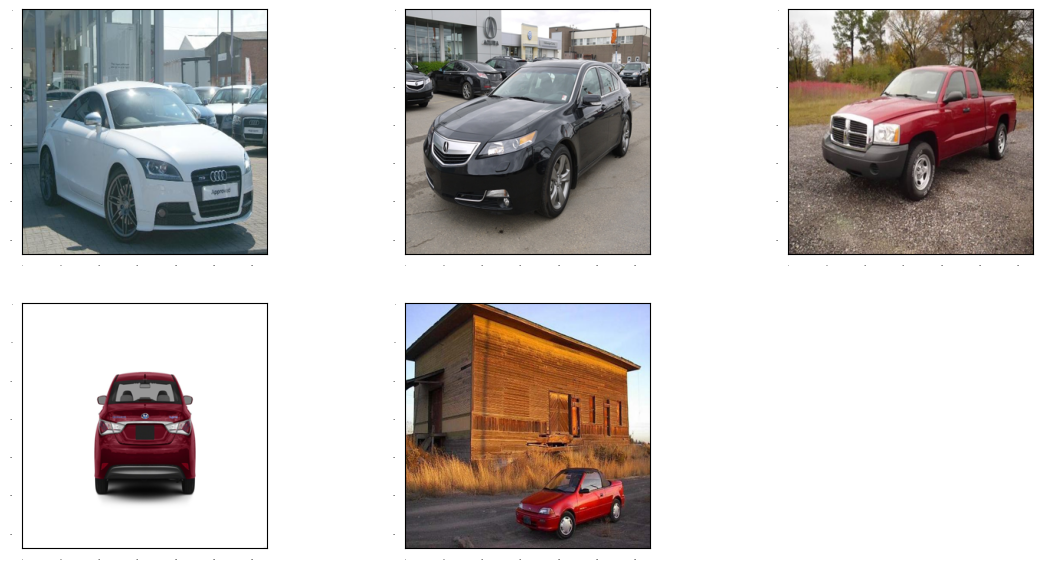

In [ ]:
train_images_np = []
for i in range(5):
    train_images_np.append(load_image_into_numpy_array2(train_ipdf.loc[i, 'image_path']))

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

for idx, train_image_np in enumerate(train_images_np):
  plt.subplot(2, 3, idx+1)
  plt.imshow(train_image_np)
plt.show()


In [ ]:
# train_images_np = []
# failed_indices = []  # Array to store indices of failed image loading

# for i in range(len(train_ipdf)):
#     img = load_image_into_numpy_array2(train_ipdf.loc[i, 'image_path'])
#     if img is not None:
#         train_images_np.append(img)
#         #print('idx', i, 'append completed')
#     else:
#         #print('idx', i, 'failed to load image')
#         failed_indices.append(i)  # Store the index of failed image loading


In [ ]:
# import time
# start_time = time.time()

# train_images_np2 = []
# failed_train_indices = []  # Array to store indices of failed image loading

# for i in range(len(train_ipdf)):
#     img = load_image_into_numpy_array2(train_ipdf.loc[i, 'image_path'])
#     if img is not None:
#         train_images_np2.append(img)
#         #print('idx', i, 'append completed')
#     else:
#         #print('idx', i, 'failed to load image')
#         failed_train_indices.append(i)  # Store the index of failed image loading

#     if (i + 1) % 200 == 0:  # Print output after every 500 iterations
#         elapsed_time = time.time() - start_time
#         print('Processed', i + 1, 'images in', elapsed_time, 'seconds')

# np.save('/content/drive/MyDrive/Himanshu/resized_ssd_320_train_images_np.npy', train_images_np2)

saved_train_np = np.load('/content/drive/MyDrive/Himanshu/resized_ssd_320_train_images_np.npy')

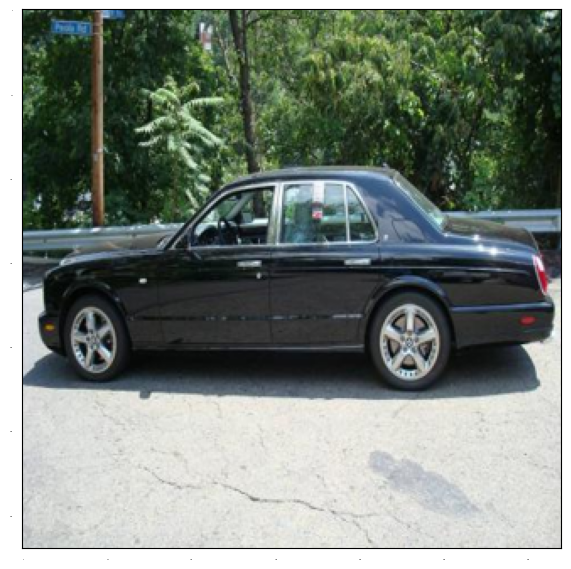

In [ ]:
plt.imshow(saved_train_np[105])

In [ ]:
#failed_train_indices

In [ ]:
# import time
# start_time = time.time()

# test_images_np2 = []
# failed_test_indices = []  # Array to store indices of failed image loading

# for i in range(2400):
#     img = load_image_into_numpy_array2(test_ipdf.loc[i, 'image_path'])
#     if img is not None:
#         test_images_np2.append(img)
#         #print('idx', i, 'append completed')
#     else:
#         #print('idx', i, 'failed to load image')
#         failed_test_indices.append(i)  # Store the index of failed image loading

#     if (i + 1) % 200 == 0:  # Print output after every 500 iterations
#         elapsed_time = time.time() - start_time
#         print('Processed', i + 1, 'images in', elapsed_time, 'seconds')

# np.save('/content/drive/MyDrive/Himanshu/resized_ssd_320_test_images_np.npy', te st_images_np)

saved_test_np = np.load('/content/drive/MyDrive/Himanshu/resized_ssd_320_test_images_np.npy')

In [ ]:
#failed_test_indices

In [ ]:
saved_failed_train_indices = [188, 764, 2421, 3191, 3828, 3974, 4822, 5673, 5680]
saved_failed_test_indices = [24, 383, 504, 1657, 2220]

In [ ]:
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  # """Wrapper function to visualize detections.

  # Args:
  #   image_np: uint8 numpy array with shape (img_height, img_width, 3)
  #   boxes: a numpy array of shape [N, 4]
  #   classes: a numpy array of shape [N]. Note that class indices are 1-based,
  #     and match the keys in the label map.
  #   scores: a numpy array of shape [N] or None.  If scores=None, then
  #     this function assumes that the boxes to be plotted are groundtruth
  #     boxes and plot all boxes as black with no classes or scores.
  #   category_index: a dict containing category dictionaries (each holding
  #     category index `id` and category name `name`) keyed by category indices.
  #   figsize: size for the figure.
  #   image_name: a name for the image file.
  # """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      skip_labels = False,
      instance_masks = None,
      instance_boundaries = None,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

In [ ]:
# Extract the columns x1_norm, y1_norm, x2_norm, y2_norm from train_ipdf
x1_norm = train_ipdf['x1_norm'].to_numpy()
y1_norm = train_ipdf['y1_norm'].to_numpy()
x2_norm = train_ipdf['x2_norm'].to_numpy()
y2_norm = train_ipdf['y2_norm'].to_numpy()

# Create the ref_gt_boxes numpy array
ref_gt_boxes = np.array([np.array([[x1, y1, x2, y2]]) for x1, y1, x2, y2 in zip(y1_norm,x1_norm, y2_norm, x2_norm)])

print(ref_gt_boxes)

[[[0.29       0.065      0.9375     0.94833333]]

 [[0.17185185 0.04       0.86962963 0.96444444]]

 [[0.22708333 0.1328125  0.79375    0.9390625 ]]

 ...

 [[0.52452026 0.03466667 0.95735608 0.88      ]]

 [[0.49297095 0.04875    0.85098407 0.930625  ]]

 [[0.35139092 0.02265006 0.99121523 0.97621744]]]


In [ ]:
len(ref_gt_boxes)

5681

In [ ]:
print(ref_gt_boxes[:5])

[[[0.29       0.065      0.9375     0.94833333]]

 [[0.17185185 0.04       0.86962963 0.96444444]]

 [[0.22708333 0.1328125  0.79375    0.9390625 ]]

 [[0.28354978 0.29571429 0.79076479 0.70666667]]

 [[0.67053364 0.45043478 0.96519722 0.89565217]]]


IndexError: invalid index to scalar variable.

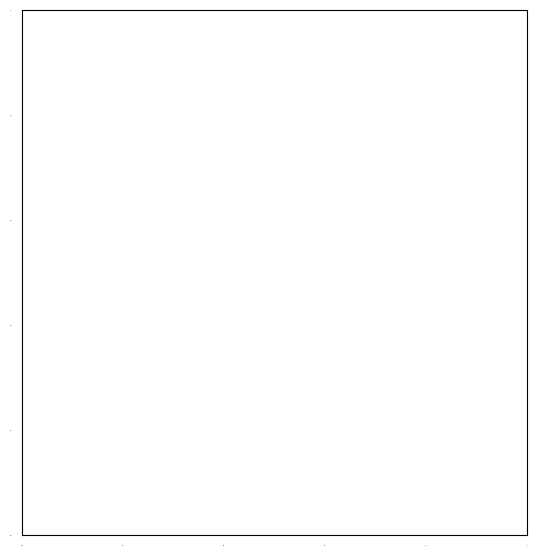

In [ ]:
dummy_scores = np.array([1.0], dtype=np.float32)
d_score = []
skip_labels = False
classes = np.array([train_ipdf.loc[idx, 'class_idx']], dtype=np.int32)
# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(5):
    plt.subplot(2, 4, idx+1)
    plot_detections(
      saved_train_np[idx],
      ref_gt_boxes[idx],
      classes[idx],
      dummy_scores, category_index)

plt.show()

In [ ]:
len(category_index)

196

In [ ]:
len(ref_gt_boxes)

5681

In [ ]:
# Create a mask to filter out the indices to be removed
mask = np.ones(len(ref_gt_boxes), dtype=bool)
mask[saved_failed_train_indices] = False
print(ref_gt_boxes.shape)
# Filter the ref_gt_boxes array using the mask
train_gt_boxes = ref_gt_boxes[mask]

# Print the filtered ref_gt_boxes array
print(train_gt_boxes.shape)

(5681, 1, 4)
(5672, 1, 4)


In [ ]:
train_gt_boxes[188]

array([[0.31294118, 0.0390625 , 0.88      , 0.96875   ]])

In [ ]:
# Extract the columns x1_norm, y1_norm, x2_norm, y2_norm from train_ipdf
x1_norm = test_ipdf['x1_norm'].to_numpy()
y1_norm = test_ipdf['y1_norm'].to_numpy()
x2_norm = test_ipdf['x2_norm'].to_numpy()
y2_norm = test_ipdf['y2_norm'].to_numpy()

# Create the ref_gt_boxes numpy array
test_gt_boxes = np.array([np.array([[x1, y1, x2, y2]]) for x1, y1, x2, y2 in zip(y1_norm,x1_norm, y2_norm, x2_norm)])

print('Before editing test GT : ',test_gt_boxes.shape)

# Create a mask to filter out the indices to be removed
mask = np.ones(len(test_gt_boxes), dtype=bool)
mask[saved_failed_test_indices] = False

# Filter the ref_gt_boxes array using the mask
test_gt_boxes = test_gt_boxes[mask]

# Print the filtered ref_gt_boxes array
print('After editing test GT : ',test_gt_boxes.shape)

Before editing test GT :  (5653, 1, 4)
After editing test GT :  (5648, 1, 4)


In [ ]:
train_classes = train_ipdf['class_idx']
print('Before removing failed train indices:',train_classes.shape)

# Create a mask to filter out the indices to be removed
mask = np.ones(len(train_classes), dtype=bool)
mask[saved_failed_train_indices] = False

# Filter the ref_gt_boxes array using the mask
train_classes = train_classes[mask]
print('After removing failed train indices:',train_classes.shape)

#----------------------------------------------------------------------------------

test_classes = test_ipdf['class_idx']
print('Before removing failed test indices:',test_classes.shape)
# Create a mask to filter out the indices to be removed
mask = np.ones(len(test_classes), dtype=bool)
mask[saved_failed_test_indices] = False

# Filter the ref_gt_boxes array using the mask
test_classes = test_classes[mask]
print('After removing failed test indices:',test_classes.shape)

Before removing failed train indices: (5681,)
After removing failed train indices: (5672,)
Before removing failed test indices: (5653,)
After removing failed test indices: (5648,)


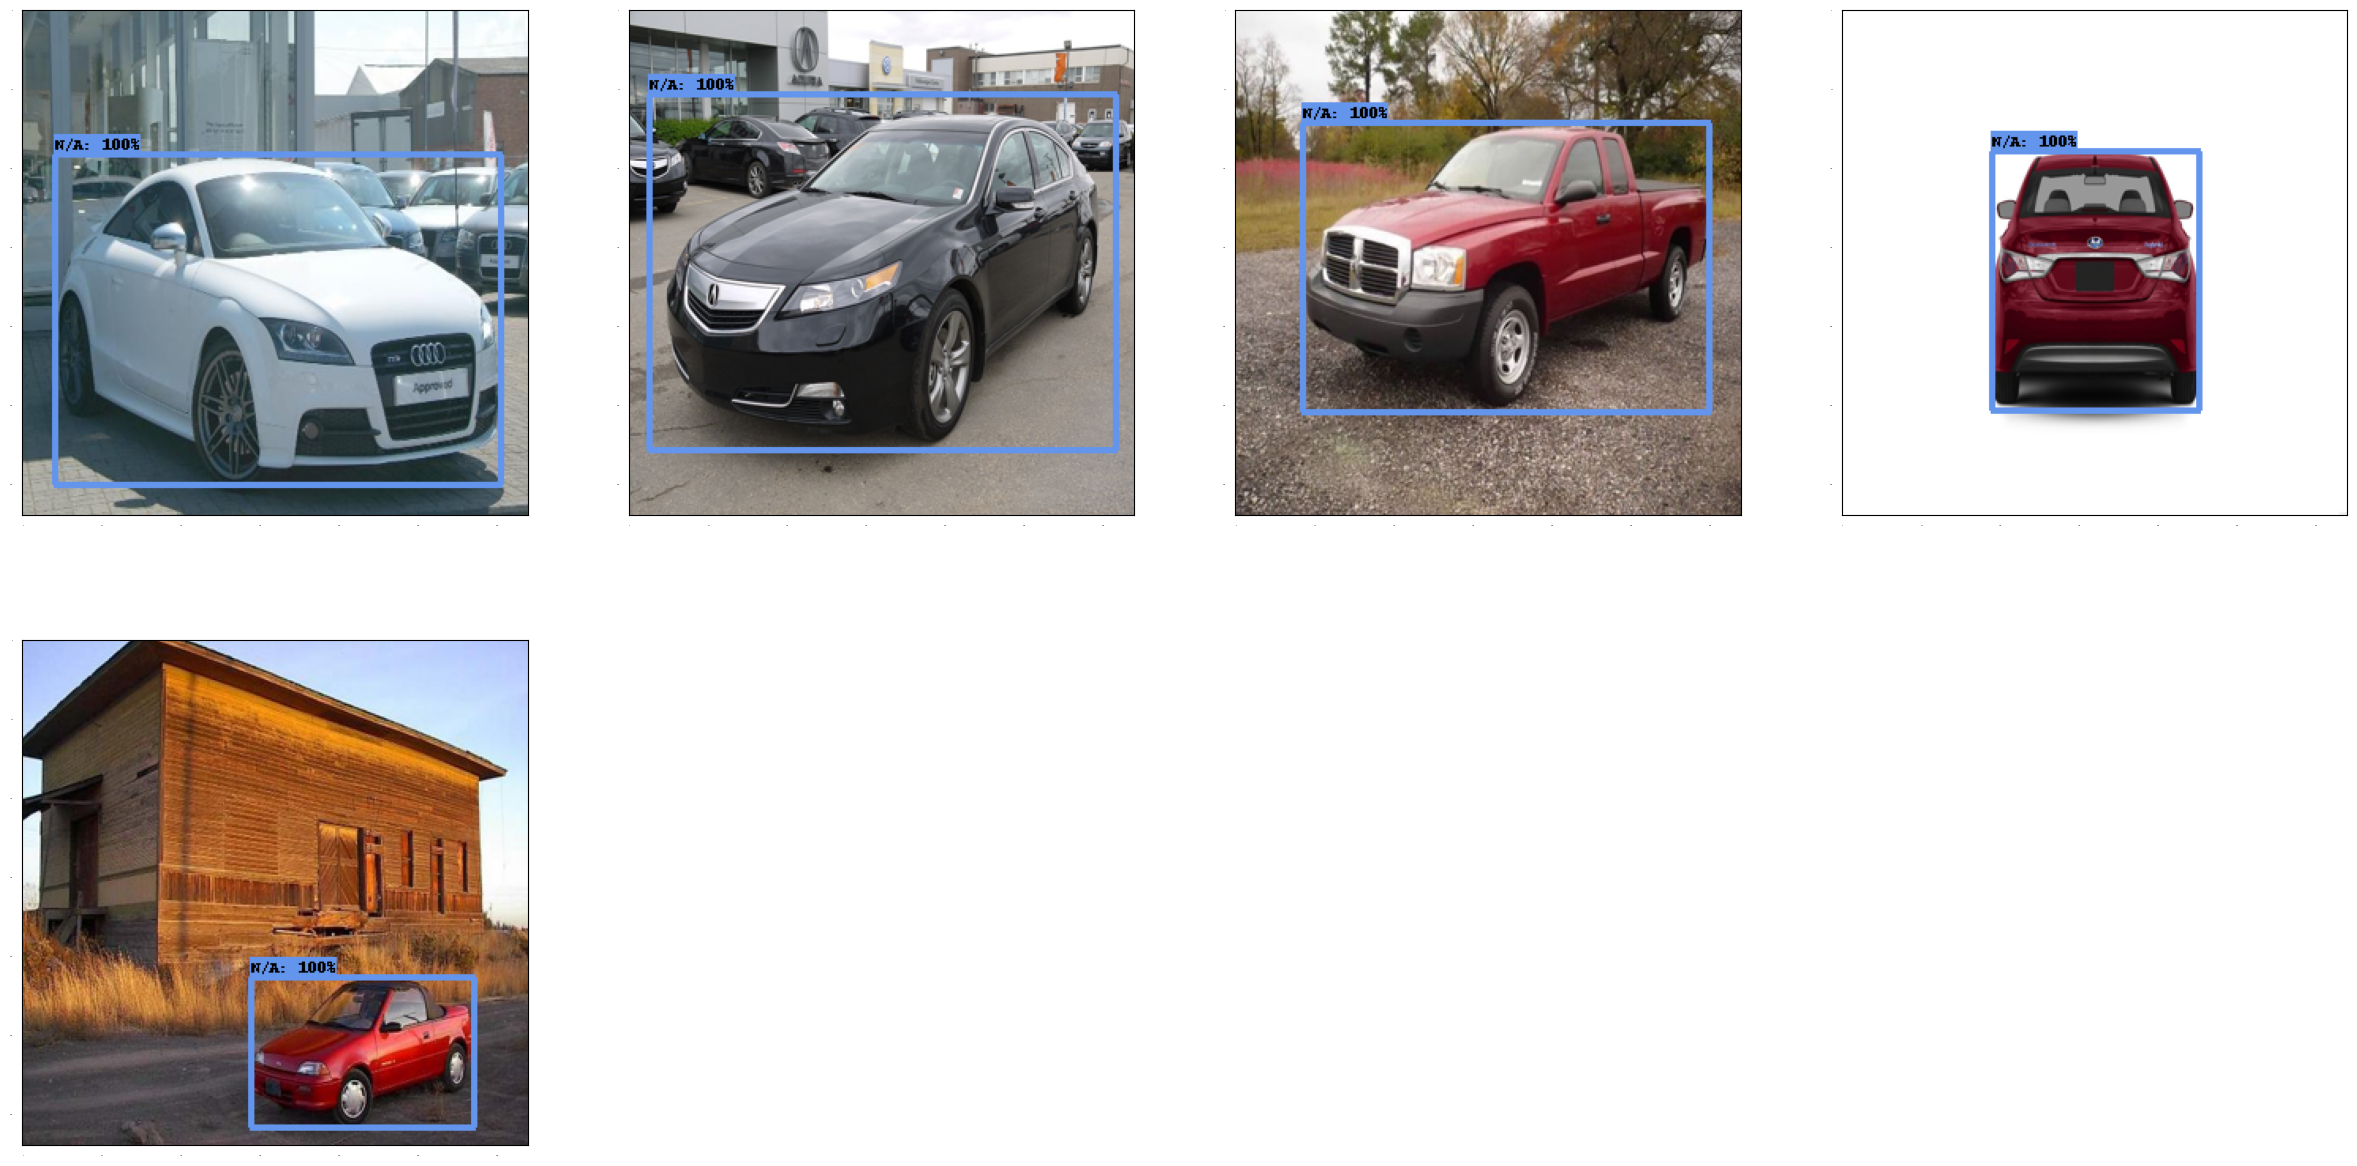

In [ ]:
dummy_scores = np.array([1.0], dtype=np.float32)
d_score = []
# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(5):
    plt.subplot(2, 4, idx+1)
    plot_detections(
      image_np = saved_train_np[idx],
      boxes = ref_gt_boxes[idx],
      classes = train_classes,
      scores = dummy_scores, category_index = category_index[idx+1])

plt.show()

In [ ]:
train_gt_box[1].shape

NameError: name 'train_gt_box' is not defined

TypeError: 'bool' object is not subscriptable

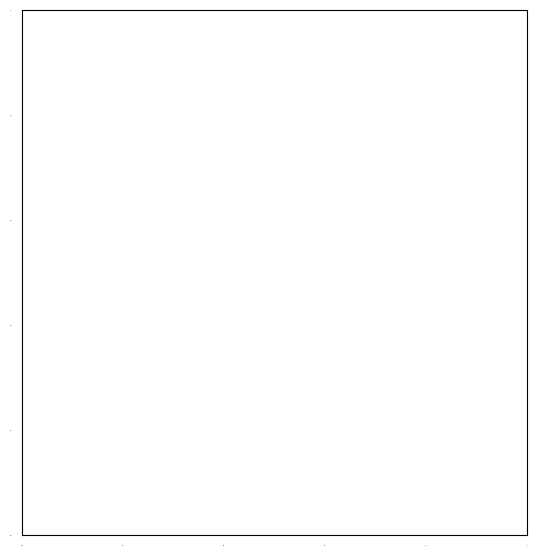

In [ ]:
dummy_scores = np.ones(train_gt_boxes.shape[0], dtype=np.float32)
classes = np.array([train_ipdf.loc[idx, 'class_idx']], dtype=np.int32)
# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(5):
    plt.subplot(2, 4, idx+1)
    plot_detections(
      image_np = saved_train_np,
      boxes = ref_gt_boxes,
      classes = train_classes,
      scores = dummy_scores, category_index = category_index[idx+1])

plt.show()

In [ ]:
num_classes = total_classes

# Convert class labels to one-hot; convert everything to tensors.
# The `label_id_offset` here shifts all classes by a certain number of indices;
# we do this here so that the model receives one-hot labels where non-background
# classes start counting at the zeroth index.  This is ordinarily just handled
# automatically in our training binaries, but we need to reproduce it here.
label_id_offset = 1
train_image_tensors = []
gt_classes_one_hot_tensors = []
gt_box_tensors = []
for (train_image_np, gt_box_np) in zip(saved_train_np, train_gt_boxes):
  train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(train_image_np, dtype=tf.float32), axis=0))
  gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
  zero_indexed_groundtruth_classes = tf.convert_to_tensor(np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) - label_id_offset)
  gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_groundtruth_classes, num_classes))
print('Done prepping data.')

Done prepping data.


In [ ]:
# model_link = http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz


# Download the checkpoint and put it into models/research/object_detection/test_data/

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2024-03-22 06:34:57--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.188.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  13.8MB/s    in 1.4s    

2024-03-22 06:35:00 (13.8 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
tf.keras.backend.clear_session()

print('Building model and restoring weights for fine-tuning...', flush=True)
num_classes = total_classes
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Load pipeline config and build a detection model.
#
# Since we are working off of a COCO architecture which predicts 90
# class slots by default, we override the `num_classes` field here to be just
# one (for our new rubber ducky class).
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

# Set up object-based checkpoint restore --- RetinaNet has two prediction
# `heads` --- one for classification, the other for box regression.  We will
# restore the box regression head but initialize the classification head
# from scratch (we show the omission below by commenting out the line that
# we would add if we wanted to restore both heads)
fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    #    (i.e., the classification head that we *will not* restore)
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
fake_model = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=fake_box_predictor)
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)
ckpt.restore(checkpoint_path).expect_partial()

# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)
print('Weights restored!')

Building model and restoring weights for fine-tuning...
Weights restored!


In [ ]:
train_images_np = saved_train_np

In [ ]:
tf.keras.backend.set_learning_phase(True)

# These parameters can be tuned; since our training set has 5 images
# it doesn't make sense to have a much larger batch size, though we could
# fit more examples in memory if we wanted to.
batch_size = 16
learning_rate = 0.01
num_batches = 700

# Select variables in top layers to fine-tune.
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']
for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

# Set up forward + backward pass for a single train step.
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):
  """Get a tf.function for training step."""

  # Use tf.function for a bit of speed.
  # Comment out the tf.function decorator if you want the inside of the
  # function to run eagerly.
  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    # """A single training iteration.

    # Args:
    #   image_tensors: A list of [1, height, width, 3] Tensor of type tf.float32.
    #     Note that the height and width can vary across images, as they are
    #     reshaped within this function to be 640x640.
    #   groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
    #     tf.float32 representing groundtruth boxes for each image in the batch.
    #   groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
    #     with type tf.float32 representing groundtruth boxes for each image in
    #     the batch.

    # Returns:
    #   A scalar tensor representing the total loss for the input batch.
    # """
    shapes = tf.constant(batch_size * [[320, 320, 3]], dtype=tf.int32)
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list)
    with tf.GradientTape() as tape:
      preprocessed_images = tf.concat(
          [detection_model.preprocess(image_tensor)[0]
           for image_tensor in image_tensors], axis=0)
      prediction_dict = model.predict(preprocessed_images, shapes)
      losses_dict = model.loss(prediction_dict, shapes)
      total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']
      gradients = tape.gradient(total_loss, vars_to_fine_tune)
      optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
    return total_loss

  return train_step_fn

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
train_step_fn = get_model_train_step_function(
    detection_model, optimizer, to_fine_tune)

print('Start fine-tuning!', flush=True)
for idx in range(num_batches):
  # Grab keys for a random subset of examples
  all_keys = list(range(len(train_images_np)))
  random.shuffle(all_keys)
  example_keys = all_keys[:batch_size]

  # Note that we do not do data augmentation in this demo.  If you want a
  # a fun exercise, we recommend experimenting with random horizontal flipping
  # and random cropping :)
  gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
  gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
  image_tensors = [train_image_tensors[key] for key in example_keys]

  # Training step (forward pass + backwards pass)
  total_loss = train_step_fn(image_tensors, gt_boxes_list, gt_classes_list)

  if idx % 10 == 0:
    print('batch ' + str(idx) + ' of ' + str(num_batches)
    + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')

Start fine-tuning!


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


batch 0 of 700, loss=1.2639791
batch 10 of 700, loss=1.2455858
batch 20 of 700, loss=1.1913944
batch 30 of 700, loss=1.0680707
batch 40 of 700, loss=0.84672856
batch 50 of 700, loss=0.5768273
batch 60 of 700, loss=0.45384538
batch 70 of 700, loss=0.44645762
batch 80 of 700, loss=0.43751854
batch 90 of 700, loss=0.39464995
batch 100 of 700, loss=0.42453742
batch 110 of 700, loss=0.35498032
batch 120 of 700, loss=0.32838318
batch 130 of 700, loss=0.3383796
batch 140 of 700, loss=0.3211953
batch 150 of 700, loss=0.35194245
batch 160 of 700, loss=0.32044786
batch 170 of 700, loss=0.30077446
batch 180 of 700, loss=0.31429353
batch 190 of 700, loss=0.2915369
batch 200 of 700, loss=0.29717118
batch 210 of 700, loss=0.29856881
batch 220 of 700, loss=0.3149092
batch 230 of 700, loss=0.35143635
batch 240 of 700, loss=0.29555723
batch 250 of 700, loss=0.32162395
batch 260 of 700, loss=0.2813957
batch 270 of 700, loss=0.27755946
batch 280 of 700, loss=0.28882363
batch 290 of 700, loss=0.2838991
ba

In [ ]:
# Save the model after fine-tuning
model_save_path = '/content/drive/MyDrive/Himanshu/weights_ssd_320_model_1'
detection_model.save_weights(model_save_path)
print('weights saved to:', model_save_path)

AttributeError: 'SSDMetaArch' object has no attribute 'save_weights'

In [ ]:
test_images_np = saved_test_np
print(test_images_np)
@tf.function
def detect(input_tensor):
  # """Run detection on an input image.

  # Args:
  #   input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
  #     Note that height and width can be anything since the image will be
  #     immediately resized according to the needs of the model within this
  #     function.

  # Returns:
  #   A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
  #     and `detection_scores`).
  # """
  preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  prediction_dict = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(prediction_dict, shapes)

# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
for i in range(5):
  input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
  print(input_tensor.shape)
  detections = detect(input_tensor)

  plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20), image_name="gif_frame_" + ('%02d' % i) + ".jpg")

[[[[125 121 118]
   [123 119 116]
   [122 118 118]
   ...
   [236 236 235]
   [236 236 236]
   [201 201 203]]

  [[126 122 119]
   [123 119 117]
   [122 118 118]
   ...
   [239 239 238]
   [240 240 240]
   [191 191 192]]

  [[116 112 108]
   [114 110 107]
   [118 114 114]
   ...
   [227 227 226]
   [229 229 229]
   [186 186 187]]

  ...

  [[206 215 216]
   [154 155 159]
   [240 239 243]
   ...
   [174 176 175]
   [160 162 161]
   [153 155 154]]

  [[226 234 236]
   [153 154 158]
   [213 211 216]
   ...
   [158 160 159]
   [173 175 174]
   [168 170 169]]

  [[235 241 242]
   [162 162 166]
   [194 194 198]
   ...
   [169 171 170]
   [168 170 169]
   [172 174 173]]]


 [[[157 156 162]
   [157 156 162]
   [156 155 162]
   ...
   [152 168 191]
   [151 167 190]
   [152 168 191]]

  [[156 155 161]
   [156 155 161]
   [155 154 161]
   ...
   [151 167 190]
   [150 166 189]
   [151 167 190]]

  [[157 156 162]
   [157 156 162]
   [156 156 163]
   ...
   [151 167 190]
   [150 166 189]
   [152 168

ValueError: in user code:

    File "<ipython-input-87-299d35a60a37>", line 17, in detect  *
        preprocessed_image, shapes = detection_model.preprocess(input_tensor)
    File "/usr/local/lib/python3.10/dist-packages/object_detection/meta_architectures/ssd_meta_arch.py", line 485, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "/usr/local/lib/python3.10/dist-packages/object_detection/utils/shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "/usr/local/lib/python3.10/dist-packages/object_detection/utils/shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "/usr/local/lib/python3.10/dist-packages/object_detection/core/preprocessor.py", line 3330, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.


In [ ]:
test_images_np.shape

(5648, 320, 320, 3)